# Text analysis in Python

In this notebook we will use code that implements some of the standard text analysis methods used in the literature. The code uses packages not included with a base installation of Python. In order to install these, you should call <code>pip install 'package-name'</code> in your command prompt, shell or terminal. If you need more information on how to use pip, refer to the [documentation](https://pypi.org/project/pip/). Alternatively, query your question in [StackOverflow](https://stackoverflow.com), which likely contains answers to all your doubts.

Once these packages have been installed in your base library (or, optimally, in a [virtual environment](https://virtualenv.pypa.io/en/latest/)), we will need to import them into the notebook. In order to do so, we define the packages to import in the code cell below.

In [1]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [2]:
# !pip install seaborn
# !pip install termcolor
# !conda install -c https://conda.anaconda.org/conda-forge wordcloud
# !pip install nltk

In [3]:
# The OS module provides functions for interacting with the operating system
import os

# pathlib is a convenient library that controls issues arising from different file systems 
from pathlib import Path

# Pandas is the canonical Python library to work with rectangular data.
import pandas as pd
pd.set_option('max_colwidth', 200)

# NumPy adds support for arrays and provides high-level mathematical functions to operate them
import numpy as np

# tqdm provides useful progress interfaces for when running code
from tqdm import tqdm
tqdm.pandas()

# matplotlib is Python's standard library for plotting results. Other packages are wrappers around matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from wordcloud import WordCloud

# regular expressions
import re

# NLTK provides a toolkit to work with natural language processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer

# Spacy is another library for advanced natural language processing
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\astro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


A cruel reality of Python classes is that notebooks need to be run in different local machines with distinct file systems. In order to minimize any issues arising from this, we will try to first define the different paths to our notebooks and data files using the <code>os</code> and <code>pathlib</code> libraries.

In [4]:
# Current working directory
os.getcwd()

"f:\\Ruben's team Dropbox\\text analysis course\\text analysis code 2024"

In [5]:
# pathlib recognizes file system type
Path(os.getcwd())

WindowsPath("f:/Ruben's team Dropbox/text analysis course/text analysis code 2024")

In [6]:
# Define file paths
basedir = Path(os.getcwd())
datadir = basedir / 'data'
utildir = basedir / 'utils'

print(basedir)
print(datadir)
print(utildir)

f:\Ruben's team Dropbox\text analysis course\text analysis code 2024
f:\Ruben's team Dropbox\text analysis course\text analysis code 2024\data
f:\Ruben's team Dropbox\text analysis course\text analysis code 2024\utils


## Text Pre-processing
In the first part of the notebook, we will introduce a series of pre-processing steps that are often implemented in most academic applications. Although it is easy to underestimate the importance of text pre-processing, decisions that you make at this stage will greatly affect the results that you get when feeding downstream algorithms. 

A priori knowledge of the data and well-defined goals are key to decide the best route ahead in text pre-processing. For example, decisions about retaining or dropping digits, stemming or lemmatizing, including or excluding certain stopwords or adding context-specific stopwords will all impact the amount of noise in our data and the variation in text that is relevant for our analysis.

Please remember that pre-processing is needed for BoW-methods, but not for Word Embeddings.

Let's start small with a simple sentence.

In [7]:
text = 'An unkempt Kansas City disc jockey named Ray has appointed himself an altar boy at the exalted shrine of jazz, and his faith burns like a five-alarm fire. Embodied with respect and ferocity by Frank Boyd in “The Holler Sessions,” which runs through Friday at the Paradise Factory, Ray radiates a hard-core obsessiveness that’s both scary and contagious. You get the feeling that he wears sunglasses inside not to be cool, but because the light he’s seen is so bright. Part of P.S. 122’s Coil Festival 2016, “The Holler Sessions,” performed and written by Mr. Boyd in collaboration with the experimental theater group the TEAM (with Rachel Chavkin and Josh Aaseng as consulting directors), creates a convincing portrait of a monomaniac that, for all its flashiness, never blocks the view of the object of his passion. Yes, Ray, with his hyperkinetic delivery and sweaty sense of urgency, is a watch-me kind of guy. But what he really wants is for us to listen — not to him, but to the discs he spins from a slovenly broadcast room (designed and lighted by Eric Southern), where he subsists on gulps of coffee, whiskey, apples and peanuts. Ray, it seems, discovered jazz only a few years ago, and he’s outraged that he’s spent so much of his life without it. How could schools have taught him about the Nina, the Pinta and the Santa Maria, he asks in astonished anger, instead of the holy trinity of Duke, Bird and Billie. Like many a classic jazz D.J., he’s steeped in the arcana of recording session lore and biographical back stories. But he also retains the frothing enthusiasm of the newborn fanboy, and he tears into convulsive, obscenity-peppered rants that emulate the riffs of his favorite artists. Not that he thinks he could ever be on their level; as Ray points out many times, he is no musician himself. A faint cloud of pathos befogs Ray when he leaves his chair to shimmy to the beats of Coltrane, Davis, Armstrong and the Charleses Parker and Mingus (Matt Hubbs did the excellent sound design), or speaks almost longingly of the lethal self-destructiveness of many of his idols. (Ray has the jerky rhythms, the motor mouth and even the nosebleeds of a cokehead.) But when Ray sits back and lets the music wash over him, there’s dignity in his awe-struck stillness. His raptness makes us want to hear through his ears. And when the theater fades to black, as it does intermittently throughout the show, and we sit in the darkness with the music, sound becomes tactile, and even pop-station babies and longhairs are likely to feel like true believers in the gospel of Ray. This information was last updated on Aug. 27, 2018'
print(text)

An unkempt Kansas City disc jockey named Ray has appointed himself an altar boy at the exalted shrine of jazz, and his faith burns like a five-alarm fire. Embodied with respect and ferocity by Frank Boyd in “The Holler Sessions,” which runs through Friday at the Paradise Factory, Ray radiates a hard-core obsessiveness that’s both scary and contagious. You get the feeling that he wears sunglasses inside not to be cool, but because the light he’s seen is so bright. Part of P.S. 122’s Coil Festival 2016, “The Holler Sessions,” performed and written by Mr. Boyd in collaboration with the experimental theater group the TEAM (with Rachel Chavkin and Josh Aaseng as consulting directors), creates a convincing portrait of a monomaniac that, for all its flashiness, never blocks the view of the object of his passion. Yes, Ray, with his hyperkinetic delivery and sweaty sense of urgency, is a watch-me kind of guy. But what he really wants is for us to listen — not to him, but to the discs he spins f

#### Tokenize
Assuming we are interested in the content of the text, it is sensible to think of a word as the elementary unit of data. Tokenization thus separates a piece of text into smaller units called tokens. Depending on the application at hand, tokens can be either words, characters, or subwords.

In [8]:
tokens = text.split()
print(tokens)

['An', 'unkempt', 'Kansas', 'City', 'disc', 'jockey', 'named', 'Ray', 'has', 'appointed', 'himself', 'an', 'altar', 'boy', 'at', 'the', 'exalted', 'shrine', 'of', 'jazz,', 'and', 'his', 'faith', 'burns', 'like', 'a', 'five-alarm', 'fire.', 'Embodied', 'with', 'respect', 'and', 'ferocity', 'by', 'Frank', 'Boyd', 'in', '“The', 'Holler', 'Sessions,”', 'which', 'runs', 'through', 'Friday', 'at', 'the', 'Paradise', 'Factory,', 'Ray', 'radiates', 'a', 'hard-core', 'obsessiveness', 'that’s', 'both', 'scary', 'and', 'contagious.', 'You', 'get', 'the', 'feeling', 'that', 'he', 'wears', 'sunglasses', 'inside', 'not', 'to', 'be', 'cool,', 'but', 'because', 'the', 'light', 'he’s', 'seen', 'is', 'so', 'bright.', 'Part', 'of', 'P.S.', '122’s', 'Coil', 'Festival', '2016,', '“The', 'Holler', 'Sessions,”', 'performed', 'and', 'written', 'by', 'Mr.', 'Boyd', 'in', 'collaboration', 'with', 'the', 'experimental', 'theater', 'group', 'the', 'TEAM', '(with', 'Rachel', 'Chavkin', 'and', 'Josh', 'Aaseng', 'as

<br>
Tokenizing represents the most basic step in creating documents from raw data. However, not all tokens are equally relevant. As an example, we may not be interested in including '—' since the additional information it provides is unlikely to justify increasing the dimension of our document-term matrix. Similarly, Python sees tokens with signs, symbols, punctuation or upper-case as distinct from their non-sign or lower-case counterparts. In order to control for these, we will remove non-alphabetic elements, punctuation and convert our data to lower case. 

Let's first detect signs and capital letters by highlighting them in the text:

In [9]:
# Allows to color parts of strings
from termcolor import colored, cprint

# Let's use a list comprehension to split the text and preserve spaces
split_text = [i for j in text.split() for i in (j, ' ')]

# Note: the line above is identical to using the following double loop:
# split_text = []
# for j in text.split():
#     for i in (j, ' '):
#         split_text.append(i)

# List comprehension that colors characters if they are upper case or not alphanumeric
col_text = [
    colored(x, 'blue') if x.isupper()                 # Blue if Upper case
    else colored(x, 'red') if not x.isalpha()         # else Red if Alphanumeric
    else x                                            # else base color
    for i in split_text for x in i                    # for each character in each word contained in split_text
]

# Join them back in a single string, with no space
print(''.join(col_text))

An unkempt Kansas City disc jockey named Ray has appointed himself an altar boy at the exalted shrine of jazz, and his faith burns like a five-alarm fire. Embodied with respect and ferocity by Frank Boyd in “The Holler Sessions,” which runs through Friday at the Paradise Factory, Ray radiates a hard-core obsessiveness that’s both scary and contagious. You get the feeling that he wears sunglasses inside not to be cool, but because the light he’s seen is so bright. Part of P.S. 122’s Coil Festival 2016, “The Holler Sessions,” performed and written by Mr. Boyd in collaboration with the experimental theater group the TEAM (with Rachel Chavkin and Josh Aaseng as consulting directors), creates a convincing portrait of a monomaniac that, for all its flashiness, never blocks the view of the object of his passion. Yes, Ray, with his hyperkinetic delivery and sweaty sense of urgency, is a watch-me kind of guy. But what he really wants is for us to listen — not to him, but to the discs he spins f

#### Remove punctuation and upper case

Python has readily available base functions that will deal with the identified characters above.

In [10]:
# Transform text to lowercase
text = text.lower()
print(text)

an unkempt kansas city disc jockey named ray has appointed himself an altar boy at the exalted shrine of jazz, and his faith burns like a five-alarm fire. embodied with respect and ferocity by frank boyd in “the holler sessions,” which runs through friday at the paradise factory, ray radiates a hard-core obsessiveness that’s both scary and contagious. you get the feeling that he wears sunglasses inside not to be cool, but because the light he’s seen is so bright. part of p.s. 122’s coil festival 2016, “the holler sessions,” performed and written by mr. boyd in collaboration with the experimental theater group the team (with rachel chavkin and josh aaseng as consulting directors), creates a convincing portrait of a monomaniac that, for all its flashiness, never blocks the view of the object of his passion. yes, ray, with his hyperkinetic delivery and sweaty sense of urgency, is a watch-me kind of guy. but what he really wants is for us to listen — not to him, but to the discs he spins f

In [11]:
# Creates a dictionary of ascii characters that will translate to ''
remove_punct = str.maketrans('','','!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”’—')

# Pass dictionary to text
text = text.translate(remove_punct) 

print(text)

an unkempt kansas city disc jockey named ray has appointed himself an altar boy at the exalted shrine of jazz and his faith burns like a fivealarm fire embodied with respect and ferocity by frank boyd in the holler sessions which runs through friday at the paradise factory ray radiates a hardcore obsessiveness thats both scary and contagious you get the feeling that he wears sunglasses inside not to be cool but because the light hes seen is so bright part of ps 122s coil festival 2016 the holler sessions performed and written by mr boyd in collaboration with the experimental theater group the team with rachel chavkin and josh aaseng as consulting directors creates a convincing portrait of a monomaniac that for all its flashiness never blocks the view of the object of his passion yes ray with his hyperkinetic delivery and sweaty sense of urgency is a watchme kind of guy but what he really wants is for us to listen  not to him but to the discs he spins from a slovenly broadcast room desi

<br>

The next step involves words themselves. One can argue that not all words are equally relevant, as some are recurrent and tied to grammar rather than them meaning of our text. These are known as **stopwords**, and include terms like _the, on, in, of, a_ etc. Several natural language processing libraries include different lists of stopwords. Let's look at <code>nltk</code> and <code>gensim</code> versions of stopwords.

##### NLTK

The Natural Language ToolKit provides easy-to-use text processing libraries and is specialized on gathering and classifying unstructured texts.

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\astro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Load the stopwords from nltk
nltk_stopwords = stopwords.words('english')

print('NLTK stopwords:',len(nltk_stopwords))
print(nltk_stopwords[:200])

NLTK stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sa

##### Gensim

Gensim is a very well optimized, but highly specialized, library that allows for jobs using shallow neural networks. 

In [14]:
import gensim
import gensim.corpora as corpora

In [15]:
# Load the stopwords from gensim
gensim_sws = gensim.parsing.preprocessing.STOPWORDS
gensim_stopwords = list(gensim_sws)

print('GENSIM stopwords:',len(gensim_stopwords))
print(gensim_stopwords[:100])

GENSIM stopwords: 337
['on', 'us', 'back', 'beside', 'nothing', 'last', 'part', 'two', 'seemed', 'any', 'me', 'am', 'throughout', 'nor', 'since', 'his', 'whereafter', 'becomes', 'whence', 'onto', 'nine', 'though', 'well', 'few', 'further', 'beyond', 'is', 'did', 'amount', 'anywhere', 'namely', 'anyway', 'show', 'yourselves', 'her', 'once', 'always', 'various', 'five', 'four', 'too', 'off', 'keep', 'first', 'are', 'been', 'at', 'otherwise', 'no', 'find', 'another', 'both', 'thru', 'inc', 'these', 'with', 'etc', 'this', 'doing', 'whole', 'bottom', 'each', 'nowhere', 'its', 'enough', 'below', 'i', 'between', 'never', 'ltd', 'should', 'whose', 'either', 'next', 'used', 'couldnt', 'please', 'became', 'thereafter', 'who', 'beforehand', 'for', 'make', 'towards', 'eg', 'has', 'ours', 'a', 'twenty', 'take', 'using', 'anyone', 'km', 'then', 'those', 'under', 'fifteen', 'computer', 'seems', 'all']


In [16]:
# Combine in a list all unique stopwords
stop_words = list(set(gensim_stopwords + nltk_stopwords))

print('Total stopwords:',len(stop_words))

Total stopwords: 390


Let's use the list of stopwords to detect irrelevant elements of the example text.

In [17]:
split_text = [i for j in text.split() for i in (j, ' ')]

# List comprehension that colors in red words included in the list of stopwords
col_text = [
    colored(x, 'red') if x in stop_words     
    else x 
    for x in split_text
]

print(''.join(col_text))

an unkempt kansas city disc jockey named ray has appointed himself an altar boy at the exalted shrine of jazz and his faith burns like a fivealarm fire embodied with respect and ferocity by frank boyd in the holler sessions which runs through friday at the paradise factory ray radiates a hardcore obsessiveness thats both scary and contagious you get the feeling that he wears sunglasses inside not to be cool but because the light hes seen is so bright part of ps 122s coil festival 2016 the holler sessions performed and written by mr boyd in collaboration with the experimental theater group the team with rachel chavkin and josh aaseng as consulting directors creates a convincing portrait of a monomaniac that for all its flashiness never blocks the view of the object of his passion yes ray with his hyperkinetic delivery and sweaty sense of urgency is a watchme kind of guy but what he really wants is for us to listen not to him but to the discs he spins from a slovenly broadcast room desig

The claim is that these words in red provide little additional information, and make downstream algorithms more computationally demanding due to increased dimensionalities. Removing these can even be useful to the human eye to more quickly identify the subject of the article.

In [18]:
col_text = [
    colored(x, 'white', 'on_white') if x in stop_words
    else x 
    for x in split_text
]

print(''.join(col_text))

an unkempt kansas city disc jockey named ray has appointed himself an altar boy at the exalted shrine of jazz and his faith burns like a fivealarm fire embodied with respect and ferocity by frank boyd in the holler sessions which runs through friday at the paradise factory ray radiates a hardcore obsessiveness thats both scary and contagious you get the feeling that he wears sunglasses inside not to be cool but because the light hes seen is so bright part of ps 122s coil festival 2016 the holler sessions performed and written by mr boyd in collaboration with the experimental theater group the team with rachel chavkin and josh aaseng as consulting directors creates a convincing portrait of a monomaniac that for all its flashiness never blocks the view of the object of his passion yes ray with his hyperkinetic delivery and sweaty sense of urgency is a watchme kind of guy but what he really wants is for us to listen not to him but to the discs he spins from a slovenly broadcast room desig

Combining tokenizing with stopwords yields the following list of tokens. Note that in some applications stopwords may be crucial and should not be removed.

In [19]:
text_tokens = [x for x in text.split() if x not in stop_words] 
print(text_tokens)

['unkempt', 'kansas', 'city', 'disc', 'jockey', 'named', 'ray', 'appointed', 'altar', 'boy', 'exalted', 'shrine', 'jazz', 'faith', 'burns', 'like', 'fivealarm', 'embodied', 'respect', 'ferocity', 'frank', 'boyd', 'holler', 'sessions', 'runs', 'friday', 'paradise', 'factory', 'ray', 'radiates', 'hardcore', 'obsessiveness', 'thats', 'scary', 'contagious', 'feeling', 'wears', 'sunglasses', 'inside', 'cool', 'light', 'hes', 'seen', 'bright', 'ps', '122s', 'coil', 'festival', '2016', 'holler', 'sessions', 'performed', 'written', 'mr', 'boyd', 'collaboration', 'experimental', 'theater', 'group', 'team', 'rachel', 'chavkin', 'josh', 'aaseng', 'consulting', 'directors', 'creates', 'convincing', 'portrait', 'monomaniac', 'flashiness', 'blocks', 'view', 'object', 'passion', 'yes', 'ray', 'hyperkinetic', 'delivery', 'sweaty', 'sense', 'urgency', 'watchme', 'kind', 'guy', 'wants', 'listen', 'discs', 'spins', 'slovenly', 'broadcast', 'room', 'designed', 'lighted', 'eric', 'southern', 'subsists', 'g

Similarly, numeric characters may be the most important tokens in some applications, or unnecessary noise in others. In this case, let's identify and remove them.

In [20]:
split_text = [i for j in text_tokens for i in (j, ' ')]

col_text = [
    colored(x, 'red') if x.isdigit()
    else x 
    for i in split_text for x in i
]

print(''.join(col_text))

unkempt kansas city disc jockey named ray appointed altar boy exalted shrine jazz faith burns like fivealarm embodied respect ferocity frank boyd holler sessions runs friday paradise factory ray radiates hardcore obsessiveness thats scary contagious feeling wears sunglasses inside cool light hes seen bright ps 122s coil festival 2016 holler sessions performed written mr boyd collaboration experimental theater group team rachel chavkin josh aaseng consulting directors creates convincing portrait monomaniac flashiness blocks view object passion yes ray hyperkinetic delivery sweaty sense urgency watchme kind guy wants listen discs spins slovenly broadcast room designed lighted eric southern subsists gulps coffee whiskey apples peanuts ray discovered jazz years ago hes outraged hes spent life schools taught nina pinta santa maria asks astonished anger instead holy trinity duke bird billie like classic jazz dj hes steeped arcana recording session lore biographical stories retains frothing e

In [21]:
split_text = [i for j in ' '.join(text_tokens).split() for i in (j, ' ')]

# Remove digit tokens
col_text = [x for i in split_text for x in i if not x.isdigit()]

text = ''.join(col_text)

print(text)

unkempt kansas city disc jockey named ray appointed altar boy exalted shrine jazz faith burns like fivealarm embodied respect ferocity frank boyd holler sessions runs friday paradise factory ray radiates hardcore obsessiveness thats scary contagious feeling wears sunglasses inside cool light hes seen bright ps s coil festival  holler sessions performed written mr boyd collaboration experimental theater group team rachel chavkin josh aaseng consulting directors creates convincing portrait monomaniac flashiness blocks view object passion yes ray hyperkinetic delivery sweaty sense urgency watchme kind guy wants listen discs spins slovenly broadcast room designed lighted eric southern subsists gulps coffee whiskey apples peanuts ray discovered jazz years ago hes outraged hes spent life schools taught nina pinta santa maria asks astonished anger instead holy trinity duke bird billie like classic jazz dj hes steeped arcana recording session lore biographical stories retains frothing enthusia

In [22]:
# A quick look at the most frequent resulting tokens may be instructive
from collections import Counter

freqs = Counter(text_tokens) # Bag of Words representation for the text
freqs.most_common()[:10]

[('ray', 9),
 ('hes', 4),
 ('jazz', 3),
 ('like', 3),
 ('boyd', 2),
 ('holler', 2),
 ('sessions', 2),
 ('theater', 2),
 ('sound', 2),
 ('music', 2)]

#### Stems, lemmas

We may also be interested in further reducing dimensionality by reducing words to their common linguistic root. In order to do so, we can either _stem_ or _lemmatize_ words. Stemming is a relatively crude method for cataloging related words; it essentially removes letters from the end until the stem is reached.

In [23]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english') # Stemming words using NLTK utility SnowballStemmer, or Porter2
tokens_stemmed = [stemmer.stem(t) for t in text.split()]
print(tokens_stemmed)

['unkempt', 'kansa', 'citi', 'disc', 'jockey', 'name', 'ray', 'appoint', 'altar', 'boy', 'exalt', 'shrine', 'jazz', 'faith', 'burn', 'like', 'fivealarm', 'embodi', 'respect', 'feroc', 'frank', 'boyd', 'holler', 'session', 'run', 'friday', 'paradis', 'factori', 'ray', 'radiat', 'hardcor', 'obsess', 'that', 'scari', 'contagi', 'feel', 'wear', 'sunglass', 'insid', 'cool', 'light', 'hes', 'seen', 'bright', 'ps', 's', 'coil', 'festiv', 'holler', 'session', 'perform', 'written', 'mr', 'boyd', 'collabor', 'experiment', 'theater', 'group', 'team', 'rachel', 'chavkin', 'josh', 'aaseng', 'consult', 'director', 'creat', 'convinc', 'portrait', 'monomaniac', 'flashi', 'block', 'view', 'object', 'passion', 'yes', 'ray', 'hyperkinet', 'deliveri', 'sweati', 'sens', 'urgenc', 'watchm', 'kind', 'guy', 'want', 'listen', 'disc', 'spin', 'sloven', 'broadcast', 'room', 'design', 'light', 'eric', 'southern', 'subsist', 'gulp', 'coffe', 'whiskey', 'appl', 'peanut', 'ray', 'discov', 'jazz', 'year', 'ago', 'hes

<br>Unfortunately, English has many exceptions where a more sophisticated method may be required. In contrast to stemming, lemmatization looks beyond word reduction and considers a language's full vocabulary to apply a morphological analysis to words. The lemma of _'was'_ is _'be'_ and the lemma of _'mice'_ is _'mouse'_. A popular library for such methods is [spaCy](https://spacy.io/models/en).

In [24]:
def show_lemmas(_text):
    for token in _text:
        print(f'{token.text:{20}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')
        
text_nlp = nlp(' '.join(text.split()) + ' mice and mouse')
show_lemmas(text_nlp[-20:])

darkness             NOUN   5523010817707517989    darkness
music                NOUN   13617878141848112644   music
sound                NOUN   1289836513871212815    sound
tactile              ADP    5132190181732026497    tactile
popstation           NOUN   3766186773784785210    popstation
babies               NOUN   11006452741498633892   baby
longhairs            NOUN   2654126123548375628    longhair
likely               ADV    6740298879949941214    likely
feel                 VERB   5741770584995928333    feel
like                 SCONJ  18194338103975822726   like
true                 ADJ    7434368892455186804    true
believers            NOUN   3634892748516982575    believer
gospel               NOUN   2006039062016309023    gospel
ray                  NOUN   11428735203161385371   ray
information          NOUN   5552516367584430480    information
updated              VERB   1936357517718432020    update
aug                  PROPN  17562083453191728838   aug
mice          

In [25]:
text_nlp

unkempt kansas city disc jockey named ray appointed altar boy exalted shrine jazz faith burns like fivealarm embodied respect ferocity frank boyd holler sessions runs friday paradise factory ray radiates hardcore obsessiveness thats scary contagious feeling wears sunglasses inside cool light hes seen bright ps s coil festival holler sessions performed written mr boyd collaboration experimental theater group team rachel chavkin josh aaseng consulting directors creates convincing portrait monomaniac flashiness blocks view object passion yes ray hyperkinetic delivery sweaty sense urgency watchme kind guy wants listen discs spins slovenly broadcast room designed lighted eric southern subsists gulps coffee whiskey apples peanuts ray discovered jazz years ago hes outraged hes spent life schools taught nina pinta santa maria asks astonished anger instead holy trinity duke bird billie like classic jazz dj hes steeped arcana recording session lore biographical stories retains frothing enthusias

## Document-term matrix

The code above serves to ilustrate some of the steps that a researcher may use to reduce the dimensionality and noise in the data. The next step is to transform our corpus on a matrix with $D$ rows and $V$ columns. This representation largely ignores interdependence between words and context, but provides a tractable form for most econometric applications.

We will use a very small corpus of articles to motivate this section. Below, we will first load the data in memory using pandas <code>read_csv</code> function. You can always type in <code>help(pd.read_csv)</code> to check the function's documentation, or resort to pandas online's documentation. Jupyter Notebooks have a convenient way of displaying a function's arguments while typing them in by pressing the <code>Shift</code>+<code>Tab</code> keys (press them twice to improve readability).

In [26]:
# Read the CSV file using pandas, and keep the column article
news_lite = pd.read_csv(datadir / 'news_lite.csv', usecols=['article'])

# We reassign the article column to make sure all articles are in their string form
news_lite['article'] = news_lite['article'].astype('str')

In [27]:
news_lite.article[0]

'CAPE TOWN (Reuters) - South African FIFA presidential candidate Tokyo Sexwale said on Monday he is a realist who is “open to negotiations and alliances” ahead of Friday’s vote in Zurich. Sexwale, whose campaign has failed to gain traction, is the first candidate in the process to suggest he could be interested in striking a deal. The millionaire businessman is up against Asian Football Confederation president Sheikh Salman Bin Ebrahim Al Khalifa, former FIFA deputy general secretary Jerome Champagne, Jordanian Prince Ali Bin Al Hussein and UEFA general secretary Gianni Infantino in the race to become head of world soccer’s governing body. FIFA is embroiled in a corruption scandal that has led to indictments against several dozen senior officials in the United States. Long-term president Sepp Blatter has been banned for eight years for ethics violations. Editing by: Ossian Shine'

In [28]:
news_lite.article.head()

0    CAPE TOWN (Reuters) - South African FIFA presidential candidate Tokyo Sexwale said on Monday he is a realist who is “open to negotiations and alliances” ahead of Friday’s vote in Zurich. Sexwale, ...
1    TOKYO, May 21 (Reuters) - Japanese government bond prices were flat on Tuesday, with a regular debt-buying operation by the central bank helping offset negative pressure from a retreat by U.S. Tre...
2         MOSCOW (Reuters) - A total of 48,000 of Russian troops have taken part in Moscow’s military campaign in Syria, Russian Defence Minister Sergei Shoigu said on Friday. Reporting by Dmitry Solovyov
3    Georgetown University, J.D.\nGeorgetown University, B.A. \n\nAdministration \n        —\n            08/13/19 12:10 PM EDT\n\n \n\nNational Security \n        —\n            08/12/19 12:19 PM EDT\...
4    Aug 16 (Reuters) - Tecan Group AG: * TECAN ACCELERATES BROAD GENOMICS STRATEGY WITH THE ACQUISITION OF NUGEN TECHNOLOGIES * CLOSING OF TRANSACTION EXPECTED WITHIN COMING WEEKS

The steps above are now all summarized in the next two code cells.

In [29]:
# Pre-processing steps
remove_punct = str.maketrans('','','!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”’©')
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [30]:
# Pre-processing function
def normalize_text(doc):
    """Takes documents as input and outputs clean tokens"""
    
    lower      = doc.lower()                                             # all lower case
    nopunc     = lower.translate(remove_punct)                           # remove punctuation
    words      = nopunc.split()                                          # split into tokens
    nostop     = [w for w in words if w not in stop_words]               # remove stopwords
    no_numbers = [w if not w.isdigit() else '' for w in nostop]          # delete numbers
    stem_text  = [stemmer.stem(w) for w in no_numbers]                   # stemming
    
    return ' '.join(stem_text)

The function above has a unique argument <code>doc</code>, which takes a document. This document is then transformed to lower, punctuation is removed, words are tokenized, stopwords and digits removed, and surviving tokens stemmed. Next, we need to iterate over the rows in our news_lite dataframe. If you are confused by the lambda expression, see [here](https://docs.python.org/3/tutorial/controlflow.html).

In [31]:
# We apply to each row the normalize_text function defined above.
news_lite['preproc'] = news_lite.article.progress_apply(lambda row: normalize_text(row))

# If the above doesn't work due to tqdm-related conflicts, run this instead:
# news_lite['preproc'] = news_lite.article.apply(lambda row: normalize_text(row))

100%|██████████| 633/633 [00:04<00:00, 141.11it/s]


In [32]:
# First processed document
news_lite.preproc[0]

'cape town reuter south african fifa presidenti candid tokyo sexwal said monday realist open negoti allianc ahead friday vote zurich sexwal whose campaign fail gain traction first candid process suggest could interest strike deal millionair businessman asian footbal confeder presid sheikh salman bin ebrahim al khalifa former fifa deputi general secretari jerom champagn jordanian princ ali bin al hussein uefa general secretari gianni infantino race becom head world soccer govern bodi fifa embroil corrupt scandal led indict sever dozen senior offici unit state longterm presid sepp blatter ban eight year ethic violat edit ossian shine'

In [33]:
# First handful of processed documents
news_lite.preproc.head()

0    cape town reuter south african fifa presidenti candid tokyo sexwal said monday realist open negoti allianc ahead friday vote zurich sexwal whose campaign fail gain traction first candid process su...
1    tokyo may  reuter japanes govern bond price flat tuesday regular debtbuy oper central bank help offset negat pressur retreat us treasuri twoyear yield 10year yield unchang minus  minus  respect 30...
2                                                        moscow reuter total  russian troop taken part moscow militari campaign syria russian defenc minist sergei shoigu said friday report dmitri solovyov
3    georgetown univers jd georgetown univers ba administr —   pm edt nation secur —   pm edt nation secur —   edt white hous —   pm edt court battl —   pm edt congress blog —   pm edt administr —   pm...
4                             aug  reuter tecan group ag tecan acceler broad genom strategi acquisit nugen technolog close transact expect within come week sourc text eikon compani

Next, we will build a matrix of term-document frequencies so as to quantify our corpus. While the matrix can be built manually, [scikit-learn](https://scikit-learn.org/stable/index.html) is well-known for having off-the-shelve features for most day-to-day Machine Learning applications. In this instance, we will use <code>CountVectorizer</code>, which creates a matrix of count frequencies from a corpus of data. 

In [34]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Call CV instance, allocate number of features (columns)
vec = CountVectorizer(max_features=20)

# Create a matrix of term-document frequencies
X = vec.fit_transform(news_lite['preproc']).todense()   # Fit data to CountVect, transform into matrix, return in dense form
words = vec.get_feature_names_out()                     # Get feature names
x_df = pd.DataFrame(X)                                  # Read matrix as a dataframe
x_df.columns = words                                    # Assign feature names to column names
x_df

also  compani  could  get  go  like  new  one  peopl  percent  presid  \
0       0        0      1    0   0     0    0    0      0        0       2   
1       1        0      0    0   0     0    0    1      0        0       0   
2       0        0      0    0   0     0    0    0      0        0       0   
3       0        0      0    0   0     0    0    0      0        0       0   
4       0        1      0    0   0     0    0    0      0        0       0   
..    ...      ...    ...  ...  ..   ...  ...  ...    ...      ...     ...   
628     0        0      0    0   0     0    0    0      0        0       0   
629     1        0      0    0   0     0    2    0      1       16       0   
630     1        4      1    0   1     0    1    0      0        0       0   
631     0        0      1    0   0     0    1    0      0        0       0   
632     0        0      0    0   0     0    0    0      0        0       1   

     report  said  say  state  time  trump  us  would  year  
0         0     1    0      1     0      0   0      0     1  
1         1     0    0      0     0      0   2      0     0  
2         1     1    0      0     0      0   0      0     0  
3         0     0    0      0     0      0   0      0     0  
4         0     0    0      0     0      0   0      0     0  
..      ...   ...  ...    ...   ...    ...  ..    ...   ...  
628       0     0    0      1     1      0   2      0     1  
629       2     1    0      1     2      0   7      0     2  
630       1     3    0      0     0      0   3      0     3  
631       0     1    0      0     1      0   0      0     2  
632       2     0    0      1     0      0   1      0     0  

[633 rows x 20 columns]

<br>Note that some applications go beyond the use of unigrams to perform text analysis. CountVectorizer can easily adapt counts for terms that may either be unigrams (one word) or several words (bigrams, trigrams).

In [35]:
vec = CountVectorizer(
    min_df=0.01,          # Minimum frequency in corpus
    max_df=.8,            # Maximum frequency allowed in corpus (pseudo-stopwords)
    max_features=20,
    ngram_range=(2,3)     # Consider words that co-occur
)

# Create a matrix of term-document frequencies
X = vec.fit_transform(news_lite['preproc']).todense()
words = vec.get_feature_names_out()
x_df = pd.DataFrame(X)
x_df.columns = words
x_df

capitol hill  communic inc  dc tel fax  donald trump  hill publish  \
0               0             0           0             0             0   
1               0             0           0             0             0   
2               0             0           0             0             0   
3               1             1           1             0             1   
4               0             0           0             0             0   
..            ...           ...         ...           ...           ...   
628             0             0           0             0             0   
629             0             0           0             0             0   
630             0             0           0             0             0   
631             0             0           0             0             0   
632             0             0           0             0             0   

     hill street nw  last week  last year  mr trump  new york  news communic  \
0                 0          0          0         0         0              0   
1                 0          0          0         0         0              0   
2                 0          0          0         0         0              0   
3                 1          0          0         0         0              1   
4                 0          0          0         0         0              0   
..              ...        ...        ...       ...       ...            ...   
628               0          0          1         0         0              0   
629               0          0          0         0         1              0   
630               0          0          0         0         1              0   
631               0          0          0         0         0              0   
632               0          0          0         0         0              0   

     news communic inc  street nw  street nw suit  subsidiari news  tel fax  \
0                    0          0               0                0        0   
1                    0          0               0                0        0   
2                    0          0               0                0        0   
3                    1          1               1                1        1   
4                    0          0               0                0        0   
..                 ...        ...             ...              ...      ...   
628                  0          0               0                0        0   
629                  0          0               0                0        0   
630                  0          0               0                0        0   
631                  0          0               0                0        0   
632                  0          0               0                0        0   

     tel fax content  unit state  washington dc  white hous  
0                  0           1              0           0  
1                  0           0              0           0  
2                  0           0              0           0  
3                  1           0              1           2  
4                  0           0              0           0  
..               ...         ...            ...         ...  
628                0           1              0           0  
629                0           1              0           0  
630                0           0              0           0  
631                0           0              0           0  
632                0           1              0           0  

[633 rows x 20 columns]

<br> A direct improvement over a matrix of counts is to weight them according to their inverse document frequency. The reasoning behind it is that words that are significative for most applications are those that appear rarely in documents (**idf**) but that are very frequent in the documents in which they do appear (**tf**). We can use scikit-learn's [TfIdfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for the task at hand.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Declare the TFIDF vectorizer and frequencies, feature number and the ngram range.
vec = TfidfVectorizer(
    min_df=0.01,
    max_df=.8,  
    max_features=20,
    ngram_range=(1,2)
)

# Create a matrix of term-document frequencies
X = vec.fit_transform(news_lite['preproc'])
X_mat = X.todense()
words = vec.get_feature_names_out()
x_df = pd.DataFrame(X_mat)
x_df.columns = words
x_df

also   compani     could  get        go  like       new       one  \
0    0.000000  0.000000  0.358401  0.0  0.000000   0.0  0.000000  0.000000   
1    0.359682  0.000000  0.000000  0.0  0.000000   0.0  0.000000  0.402114   
2    0.000000  0.000000  0.000000  0.0  0.000000   0.0  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.0  0.000000   0.0  0.000000  0.000000   
4    0.000000  1.000000  0.000000  0.0  0.000000   0.0  0.000000  0.000000   
..        ...       ...       ...  ...       ...   ...       ...       ...   
628  0.000000  0.000000  0.000000  0.0  0.000000   0.0  0.000000  0.000000   
629  0.040472  0.000000  0.000000  0.0  0.000000   0.0  0.082992  0.000000   
630  0.140733  0.626721  0.164924  0.0  0.185868   0.0  0.144294  0.000000   
631  0.000000  0.000000  0.414341  0.0  0.000000   0.0  0.362512  0.000000   
632  0.000000  0.000000  0.000000  0.0  0.000000   0.0  0.000000  0.000000   

       peopl  percent    presid    report      said  say     state      time  \
0    0.00000  0.00000  0.772939  0.000000  0.251666  0.0  0.355285  0.000000   
1    0.00000  0.00000  0.000000  0.332758  0.000000  0.0  0.000000  0.000000   
2    0.00000  0.00000  0.000000  0.747193  0.664607  0.0  0.000000  0.000000   
3    0.00000  0.00000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
4    0.00000  0.00000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
..       ...      ...       ...       ...       ...  ...       ...       ...   
628  0.00000  0.00000  0.000000  0.000000  0.000000  0.0  0.406695  0.396360   
629  0.05066  0.93428  0.000000  0.074885  0.033304  0.0  0.047016  0.091643   
630  0.00000  0.00000  0.000000  0.130199  0.347424  0.0  0.000000  0.000000   
631  0.00000  0.00000  0.000000  0.000000  0.290946  0.0  0.000000  0.400301   
632  0.00000  0.00000  0.460630  0.674463  0.000000  0.0  0.423462  0.000000   

     trump        us  would      year  
0      0.0  0.000000    0.0  0.290775  
1      0.0  0.773437    0.0  0.000000  
2      0.0  0.000000    0.0  0.000000  
3      0.0  0.000000    0.0  0.000000  
4      0.0  0.000000    0.0  0.000000  
..     ...       ...    ...       ...  
628    0.0  0.752800    0.0  0.332851  
629    0.0  0.304599    0.0  0.076959  
630    0.0  0.453936    0.0  0.401415  
631    0.0  0.000000    0.0  0.672321  
632    0.0  0.391918    0.0  0.000000  

[633 rows x 20 columns]

# Dictionary methods

This section presents basic dictionary-based methods as it recreates the baseline method followed by Hassan and coauthors in their 2019 QJE academic paper, [_Firm-Level Political Risk: Measurements and Effects_](https://www.bu.edu/econ/files/2019/05/Firm-levelPoliticalRisk.pdf). 

The paper uses political and non-political dictionaries (as well as sentiment dictionaries à la [Loughran and McDonald](https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1540-6261.2010.01625.x)) to study the effects political events have on firm-level uncertainty by observing companies' quarterly earnings conference calls and drawing measures of event coverage and uncertainty assesment. More specifically, in their baseline scenario the authors build a dictionary of political terms not included in non-political jargon (so as to clearly distinguish from terms that may be common to both) and track occurrences of such terms when in close proximity of words that relate to risk.

The premise, albeit simple, proves robust to many specifications and performs admirably in capturing political risk. The measure varies across sectors and over time in a logical manner,  with spikes around federal elections and other typically turbulent political events. Increases in the firm-level measure of risk are also associated with increases in stock return volatility and donations to political campaigns,  as well as with decreases in firms' investment, planned capital expenditures, and hiring. Contrary to traditional assumptions, the authors show that most of the variation in measured political risk occurs at the firm level, rather than the sector one.

$$
y_{i t}=\delta_{t}+\delta_{s}+\beta P R i s k_{i t}+\gamma X_{i t}+\epsilon_{i t}
$$

<div style="text-align:center"><img src="figs/C2_1.png" width="800" align="center"></div>

<div style="text-align:center"><img src="figs/C2_2.png" width="600" align="center"></div>

In the code that follows, we will adopt a slightly different approach, partly due to file size concerns. We will present the tools necessary to replicate the text analysis section of the paper on a different body of text, namely a subset of articles published between 2016 and 2020 by a handful of news sources which will then be used on a sample of conference calls.

#### Load data & exploratory analysis

In [37]:
# Read the CSV file using pandas, and keep the column article
main_df = pd.read_csv(datadir / 'news.csv', parse_dates=['date'], index_col=[0])

# We reassign the article column to make sure all articles are in their string form
main_df['article'] = main_df['article'].astype('str')

In [38]:
# Return the row-length and column-length in your dataframe "main_df"
main_df.shape

(63330, 6)

In [39]:
# Return handful of first rows in your dataframe "main_df"
main_df.head()

date  \
183214 2016-04-21 00:00:00   
244482 2018-04-11 00:00:00   
337985 2019-03-14 07:00:04   
280130 2016-09-08 00:00:00   
208548 2016-06-28 00:00:00   

                                                                                                                                                                                                     author  \
183214                                                                                                                                                                                          Nick Jaynes   
244482                                                                                                                                                                                                  NaN   
337985  James Kent, Jeannette Catsoulis, James Kent, Joe Shrapnel, Anna Waterhouse, Rhidian Brook, Rhidian Brook (novel), Keira Knightley, Ned Wills, Pandora Colin, Jason Clarke, Anna Katharina Schimrigk   
280130                                                                                                                                                                                   Maria Haase Coelho   
208548                                                                                                                                                                                                  NaN   

                                                                                           title  \
183214                                 McLaren's 570S will make you scream with delight [REVIEW]   
244482                        Saudi Aramco says Jizan facilities safe after Houthis claim attack   
337985                                ‘The Aftermath’ Review: Illicit Passion in Postwar Hamburg   
280130               'Go directly to a homeless shelter': game gives taste of life on the street   
208548  BRIEF-MDU expects after-tax impairment charge from discontinued operations $150-$160 mln   

                                                                                                                                                                                                        article  \
183214  McLaren's 570S might look like a supercar but it's actually a sports car. By McLaren standards, that is. This is as subtle as the 570S gets. McLaren calls them "dihedral doors" but they'll always ...   
244482  DUBAI, April 11 (Reuters) - Saudi Aramco said on Wednesday its facilities in the southwestern province of Jizan were operating “normally and safely” after Yemen’s Houthi movement said it launched ...   
337985  When you purchase a ticket for an independently reviewed film through our site, we earn an affiliate commission. “The Aftermath” opens in 1945 and could easily have been made then, too. An old-fas...   
280130  BRUSSELS (Reuters) - If being sent to jail without passing ‘Go’ or winning second prize in a beauty contest make “Monopoly” feel oddly detached from real life, a new board game - about homelessnes...   
208548  June 28 (Reuters) - Mdu Resources Group Inc * Anticipates after-tax impairment charge from discontinued operations in range of $150 million-$160 million, to be recorded in Q2 Source: (1.usa.gov/28...   

            section         publication  
183214          NaN            Mashable  
244482  market news             Reuters  
337985       movies  The New York Times  
280130    lifestyle             Reuters  
208548  market news             Reuters

In [40]:
# Print the list of unique publication strings in your dataframe "main_df"
print(main_df.publication.unique())

['Mashable' 'Reuters' 'The New York Times' 'CNN' 'CNBC' 'TechCrunch'
 'The Hill' 'Axios' 'Business Insider' 'Economist']


In [41]:
# Print the first article (python lists are 0-indexed)
main_df = main_df.reset_index(drop=True)
main_df.article[0]

'McLaren\'s 570S might look like a supercar but it\'s actually a sports car. By McLaren standards, that is. This is as subtle as the 570S gets. McLaren calls them "dihedral doors" but they\'ll always be "billionaire doors" to me. The design of the rear-end is as functional at keeping the body planted on the pavement as it is delightful to look at. Those tendons come off the doors to help route air to into the V8 engine. I don\'t know about you, but that nose looks like a mini Lamborghini front-end to me. Just hanging out with some of the greats. That lip helps, too. "Oooooohhh myyyyyyy gaaaaaaaawwwwd!" my passenger, Jon, screamed, as I punched the throttle on the McLaren 570S. "Aaaaahhhhhhhh!" "A—are you being serious?" I stammered back at Jon. "You don\'t have to put on an act for me," I said. I\'d never heard anyone in real life react that way inside of a fast car. "This thing is like a rollercoaster!" he shouted back at me over the sound of the roaring V8\'s wheezing turbochargers. 

In [42]:
for col in main_df.columns:                                        # for each column in your "main_df" dataframe
    miss_tp = main_df[col].isna().sum()                            # select the pandas series corresponding to the column, call function isna(), sum count across column
    print(f'Number of missing observations in {col}: {miss_tp}')   # Print results using f-strings

Number of missing observations in date: 0
Number of missing observations in author: 29412
Number of missing observations in title: 0
Number of missing observations in article: 0
Number of missing observations in section: 16389
Number of missing observations in publication: 0


#### Basic plots

It may be useful to form an idea of the time distribution of our articles as well as the category they were published under. Note we will use the package <code>seaborn</code>, a wrapper around matplotlib that allows for aesthetic single-line plots.

In [43]:
# Select the "section" pandas series, pass function value_counts(), take first 50 results, take their names, pass them as list
top50_sects = main_df['section'].value_counts()[:50].index.tolist()

In [44]:
# Access a group of rows using loc passing a boolean whether each row's section is in the top 50 chosen above 
plt_df = main_df.loc[main_df.section.isin(top50_sects)]

In [45]:
# Top 5 sections
top50_sects[:5]

['market news', 'world news', 'business news', 'politics', 'wires']

c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

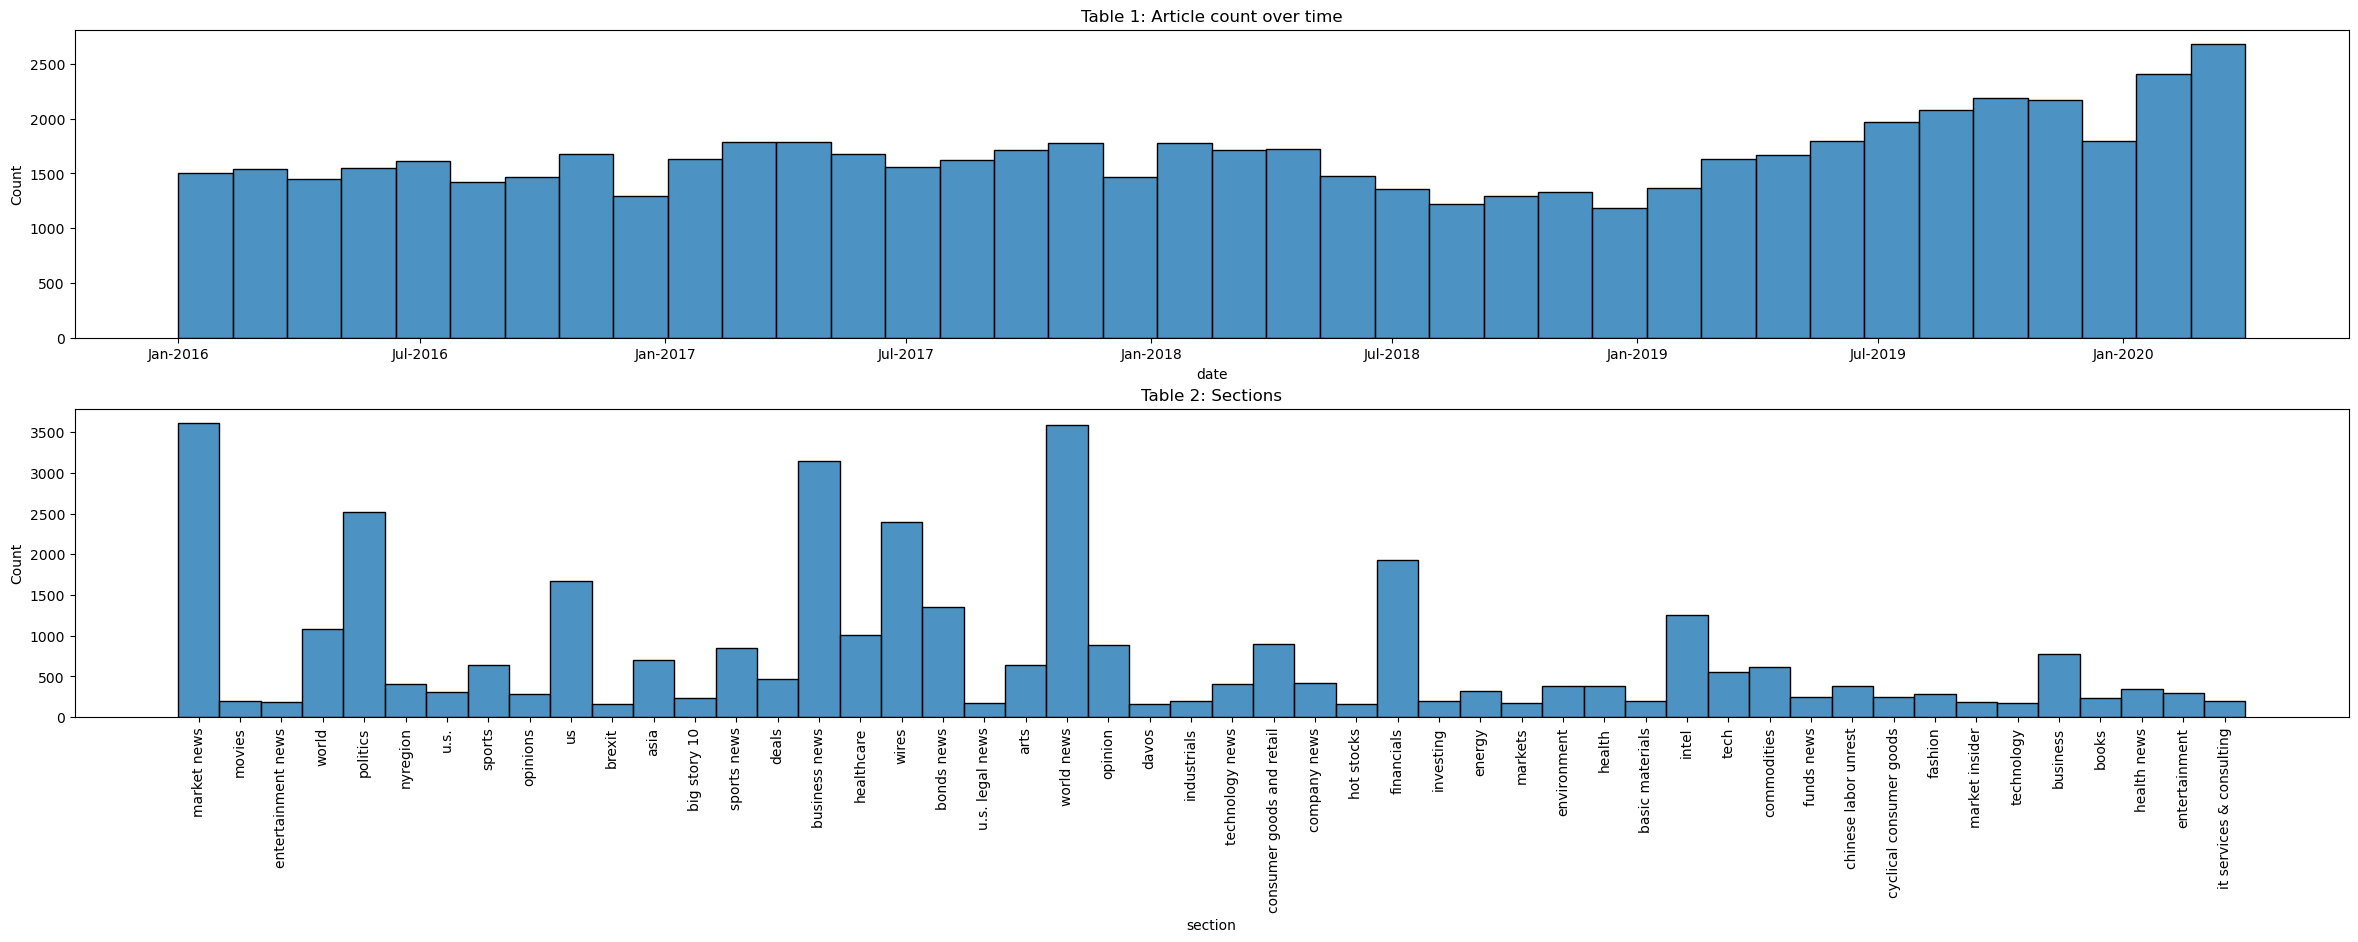

In [46]:
# Plot article time count and section relevance

fig, axes = plt.subplots(2, 1, figsize=(24, 8))              # Define the subplot space
fig.tight_layout(pad=3)                                      # Tighten layout to prevent overlap

sns.histplot(                                                # Seaborn histogram
    ax=axes[0],                                              # axes position to occupy
    data=main_df, x="date",                                  # data to use, define x
    alpha=.8, linewidth=1,                                   # Aesthetics
)

sns.histplot(                                                # Seaborn histogram
    ax=axes[1],                                              # axes position to occupy
    data=plt_df, x="section",                                # data to use, define x
    alpha=.8, linewidth=1,                                   # Aesthetics
)

# Pass title names, reformat x axis labels
monthyearFmt = mdates.DateFormatter('%b-%Y')
axes[0].xaxis.set_major_formatter(monthyearFmt)
_ = axes[0].set_title('Table 1: Article count over time')
axes[1].tick_params(axis='x', rotation=90)
_ = axes[1].set_title('Table 2: Sections')

## Build dictionary - Politics

Hassan and coauthors have two methods of building their political and non-political dictionaries, namely using textbooks or news articles. In this script we opt for the second one, and use a similar keyword to the one used by the authors (<u>_domestic politics_</u>) to draw a subset of articles from to build the political dictionary.

In [47]:
# Drop articles without any text
main_df = main_df.dropna(subset=['article'])

In [48]:
# Select rows given loc boolean with articles that include word politics
politics_df = main_df.loc[main_df.article.str.contains('politics')]

In [49]:
politics_df.shape

(2537, 6)

### Text Preprocessing

Note the same set of steps presented in the previous section are now followed here. As usual, one ought to be careful in the decisions made regarding pre-processing. In this instance, we will remove stopwords and digits, and we will use stemmed words over their original counterparts to build the politics dictionary.

In [50]:
# Pre-processing steps
remove_punct = str.maketrans('','','!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”’©')
stop_words = stopwords.words('english')
stop_words.append('hes')
stemmer = SnowballStemmer('english')

In [51]:
# Pre-processing function
def normalize_text(doc):
    """Takes documents as input and outputs clean tokens"""
    
    lower      = doc.lower()                                             # all lower case
    nopunc     = lower.translate(remove_punct)                           # remove punctuation
    words      = nopunc.split()                                          # split into tokens
    nostop     = [w for w in words if w not in stop_words]               # remove stopwords
    no_numbers = [w if not w.isdigit() else '' for w in nostop]          # normalize numbers
    stem_text  = [stemmer.stem(w) for w in no_numbers]                   # stem each word
    
    
    return stem_text

In [52]:
politics_df = politics_df.copy()                          # Create a copy of original file (hack to prevent pandas warnings)

politics_df['preproc'] = (                                # Create column in dataframe "politics_df" using multi-line
    politics_df['article']                                # Use data in article column to create preproc
    .astype(str)                                          # As type string, prevent floats/ints from exiting your code
    .progress_apply(lambda p: normalize_text(p))          # Apply the function normalize_text() to each row using apply (or tqdm's wrapper around apply called progress_apply)
)

politics_df['preproc'] = [' '.join(word) for word in politics_df['preproc']] # Join the lists of tokens

  0%|          | 5/2537 [00:00<01:36, 26.18it/s]

100%|██████████| 2537/2537 [00:55<00:00, 45.82it/s]


In [53]:
politics_df.article.iloc[0]

'The First Time One evening in May 1975, I stood outside a bank in Ann Arbor, Mich., and lit every dollar in my wallet on fire. As the bills burned, I held them up to the sky, tears streaming down my face. It was a moment that, in slow motion, changed my life. I was born in 1958 and came of age in the ’70s. I was raised in Minnesota by progressive Democrats (on my father and stepmother’s side) and deeply committed Communists (my mother and stepfather). My father was a proud leader of the D.F.L., the Democratic-Farmer-Labor Party, Minnesota’s own version of the national Democratic Party. The D.F.L., the party of Eugene McCarthy, Walter Mondale, Hubert Humphrey and, later, Paul Wellstone, was the product of a merger that left it a living representative of the progressive ideals of the 1930s. After my parents’ divorce, my mother married a second-generation Communist. She then converted and remained a passionate and committed party member until her death in 2014. Her doctoral thesis was on

In [54]:
politics_df.preproc.iloc[0]

'first time one even may  stood outsid bank ann arbor mich lit everi dollar wallet fire bill burn held sky tear stream face moment slow motion chang life born  came age 70s rais minnesota progress democrat father stepmoth side deepli commit communist mother stepfath father proud leader dfl democraticfarmerlabor parti minnesota version nation democrat parti dfl parti eugen mccarthi walter mondal hubert humphrey later paul wellston product merger left live repres progress ideal 1930s parent divorc mother marri secondgener communist convert remain passion commit parti member death  doctor thesi puritan spiritu autobiographi given puritan scholar turn communist instinct disciplin ascetic deepli ground famili root polit life although profound differ two set parent polit otherwis commit social engag better world four saw function life give back greater societi struggl make equit planet also academ four parent professor univers minnesota law women studi physic public polici natur went art did

#### Political dictionary

In [55]:
#Get the term-document matrix of bigrams
countvec = CountVectorizer(
    analyzer  = 'word',        # Arg: feature as word (use analyzer to collapse all steps in the future!)
    ngram_range = (2, 2),      # Arg: a range of n-grams to extract as features 
    stop_words = None,         # Arg: stopwords (already removed above)
    encoding = "utf-8",        # Arg: Variable-width encoding
    decode_error = "replace",  # Arg: Instruction to deal with non-UTF-8
    max_features = 10000,       # Arg: Maximum number of features
    min_df = 0.001,             # Arg: Minimum frequency of words-features
    max_df = 0.6               # Arg: Maximum frequency of words-features
)

data_tf = countvec.fit_transform(politics_df.preproc)        # Train and transform  

X_mat = data_tf.todense()                                    # Output in dense format

words = countvec.get_feature_names_out()                     # Store word names

X_mat.shape

# Create dataframe with rows as documents and columns as features selected
x_df = pd.DataFrame(X_mat)
x_df.columns = words

In [56]:
x_df.shape

(2537, 10000)

In [57]:
x_df.head(10)

1980s 1990s  19th amend  19th centuri  20th centuri  21st centuri  3b cut  \
0            0           0             0             0             0       0   
1            0           0             0             0             0       0   
2            0           0             0             0             0       0   
3            0           0             0             0             0       0   
4            0           0             0             0             0       0   
5            0           0             0             1             0       0   
6            0           0             0             0             0       0   
7            0           0             0             0             0       0   
8            1           0             0             0             0       0   
9            0           0             0             0             0       0   

   45th presid  50th anniversari  abc news  abl find  ...  your look  \
0            0                 0         0         0  ...          0   
1            0                 0         0         0  ...          0   
2            0                 0         0         0  ...          0   
3            0                 0         0         0  ...          0   
4            0                 0         0         0  ...          0   
5            0                 0         0         0  ...          0   
6            0                 0         0         0  ...          0   
7            0                 0         0         0  ...          0   
8            0                 0         0         0  ...          0   
9            0                 0         0         0  ...          0   

   your right  your say  your see  your talk  youtub video  youv got  \
0           0         0         0          0             0         0   
1           0         0         0          0             0         0   
2           0         0         0          0             0         0   
3           0         0         0          0             0         0   
4           0         0         0          0             0         0   
5           0         0         0          0             0         0   
6           0         0         0          0             0         0   
7           0         0         0          0             0         0   
8           0         0         0          0             0         0   
9           0         0         0          0             0         0   

   yuli cruz  zero toler  zone pelosi  
0          0           0            0  
1          0           0            0  
2          0           0            0  
3          0           0            0  
4          0           0            0  
5          0           0            0  
6          0           0            0  
7          0           0            0  
8          0           0            0  
9          0           0            0  

[10 rows x 10000 columns]

#### Wordcloud

Wordclouds are a useful tool to visualize the term-document matrix results. These display words and scale their font size given a weight. In this case, the weight given is simply the word frequency in each document, which is obtained by summing across columns in the tdf matrix above. 

In [58]:
# Per word total frequency
word_counts = x_df.sum(axis=0).reset_index()

In [59]:
# Dictionary of term: frequency
word_counts = dict(zip(word_counts['index'], word_counts[0]))

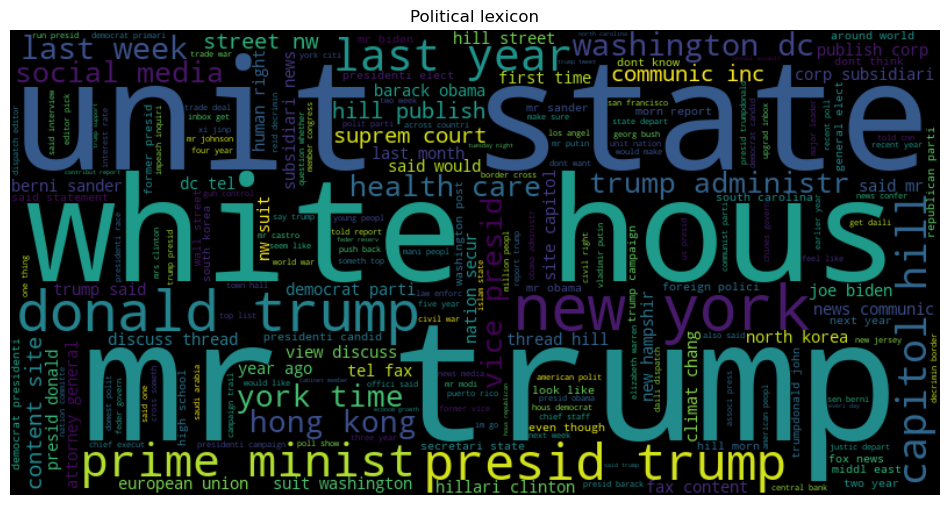

In [60]:
# Create wordcloud 
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_counts)

fig, _ = plt.subplots(1,1,figsize=(12,10))
plt.imshow(wc, interpolation = 'bilinear')
_.set_title('Political lexicon')
plt.axis("off")
plt.show()

## Build dictionary - Non-Politics, i.e. economics

In order to recreate the more complex dictionary followed by Hassan and coauthors, we match for articles in our sample data that contain the word performance. Note that while this word hardly applies only to the economy, this sample is somewhat curated and contains mostly economic-related articles. The steps are similar to the ones above, and at this point hopefully you'll be familar with them.

In [61]:
economics_df = main_df.loc[main_df.article.str.contains('econom')]

Since the function <code>normalize_text</code> was already defined above, we do not need to redefine it and can instead just call it on this separate body of text. 

In [62]:
economics_df.shape

(12569, 6)

In [63]:
economics_df = economics_df.copy()

economics_df['preproc'] = (
    economics_df['article']
    .astype(str)
    .progress_apply(lambda row: normalize_text(row))
)

economics_df['preproc'] = [' '.join(word) for word in economics_df['preproc']]

100%|██████████| 12569/12569 [02:33<00:00, 81.75it/s] 


In [64]:
#Get the term-document matrix of bigrams
countvec_ec = CountVectorizer(
    analyzer  = 'word',         # Arg: feature as word
    ngram_range  = (2, 2),      # Arg: a range of n-grams to extract as features 
    stop_words   = None,        # Arg: stopwords (already removed above)
    encoding     = "utf-8",     # Arg: Variable-width encoding
    decode_error = "replace",   # Arg: Instruction to deal with non-UTF-8
    max_features = 10000,        # Arg: Maximum number of features
    min_df       = 0.001,        # Arg: Minimum frequency of words-features
    max_df       = 0.6          # Arg: Maximum frequency of words-features
)

data_tf_ec = countvec_ec.fit_transform(economics_df.preproc)    # Train and transform  

X_mat_ec = data_tf_ec.todense()                                 # Output in dense format

words_ec = countvec_ec.get_feature_names_out()                         # Store word names

X_mat_ec.shape

# Data snippet
x_df_ec = pd.DataFrame(X_mat_ec)
x_df_ec.columns = words_ec

#### Wordcloud and counts

 Again, wordclouds are useful to catch a glimpse of the resulting bigrams. Note that while this notebook is just meant to give you a flavor of the paper's steps, additional processing and data collection seem necessary to build a more representative and meaningful dictionary.

In [65]:
word_counts_ec = x_df_ec.sum(axis=0).reset_index()
word_counts_ec = dict(zip(word_counts_ec['index'], word_counts_ec[0]))

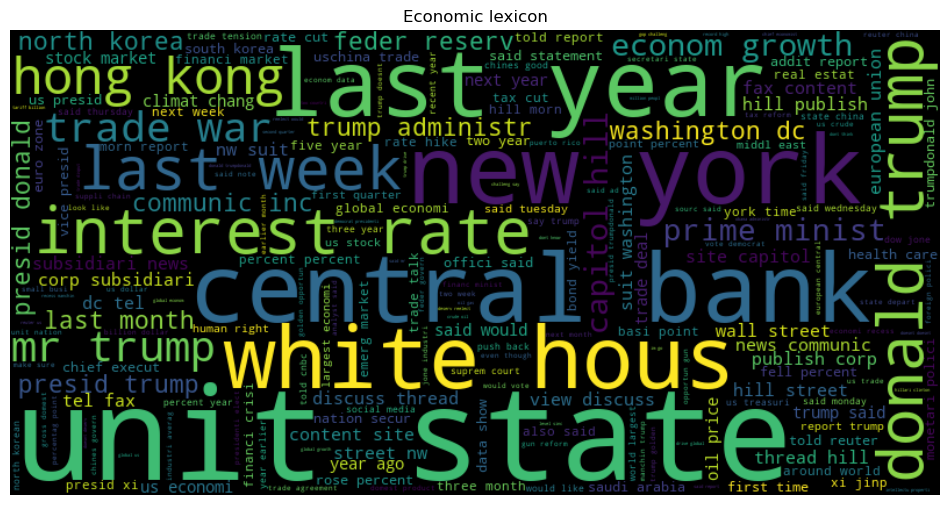

In [66]:
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_counts_ec)

fig, _ = plt.subplots(1,1,figsize=(12,10))
_.set_title('Economic lexicon')
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Hassan et al.'s Political risk measure

The paper's methodology takes measuring political risk one step further. Since words typically associated to political events may also be widely used in non-political topics, simply using their frequency in political newspaper articles may yield noisy measures of risk. In order to tackle this issue, Hassan and coauthors present a slight variation of the formula above, which reads:

$$
\text { PRisk }_{i t}=\frac{\sum_{b}^{B_{i t}}\left(1[b \in \mathbb{P} \backslash \mathbb{N}] \times 1[|b-r|<10] \times \frac{f_{b, P}}{B_{p}}\right)}{B_{i t}}
$$

The main difference is that the indicator function now only activates for words in the political lexicon **not** present in the non-political one. The authors claim that in this way they are able to capture discussions on political events that are unrelated to other topics, thus increasing precision and reducing noise in the measurement variable. Let us replicate their methodology on the sample of articles that mention India and China, and see how the U.S. perception of risk towards either country changes over time. 

In [67]:
# Exclude from the political dictionary words that are also featured in the economic dictionary
words_polrisk = [x for x in words if x not in words_ec]

The cell above uses the inaptly named "words" object, which is the list of political bigrams, and checks for each of the bigrams whether the same one is found in the economic dictionary. Those bigrams that are not found in the latter are then associated to non-economic political factors. The figure below depicts a wordcloud representation of the resulting dictionary.

In [68]:
# Count the number of times each word in the dictionary appears in the corpus of data
f_word_counts = {k: word_counts[k] for k in words_polrisk if k in word_counts}

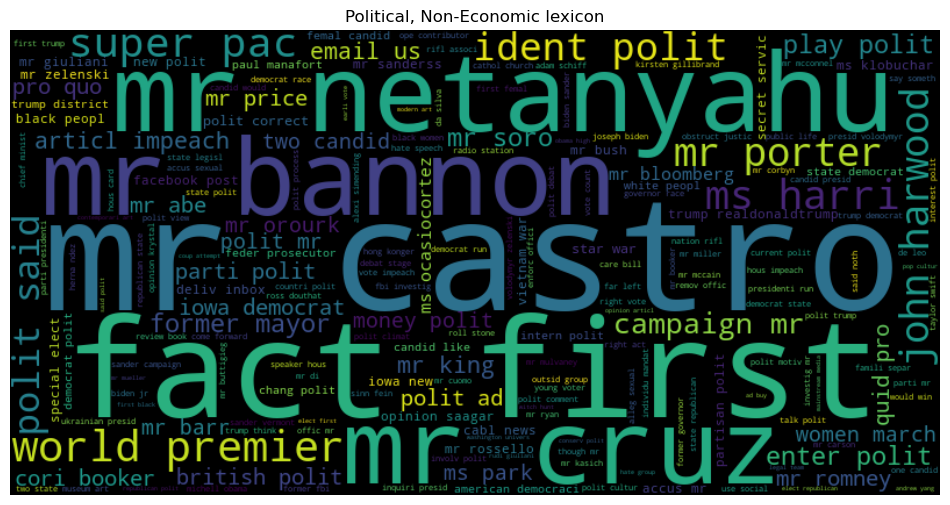

In [69]:
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(f_word_counts)

fig, _ = plt.subplots(1,1,figsize=(12,10))
plt.imshow(wc, interpolation = 'bilinear')
_.set_title('Political, Non-Economic lexicon')
plt.axis("off")
plt.show()

In [70]:
len(words_polrisk)

5060

# Risk synonyms

Hassan and coauthors use risk and a set of synonyms in order to build a measure of political risk that only takes into account political term occurrences when in proximity of a synonym of risk. We use the same synonyms below. 

In [71]:
risk_syn = (
    pd.read_excel(datadir / 'risk_synonyms.xlsx', engine='openpyxl')
    ['risk']
    .str
    .lower()
    .apply(lambda x: stemmer.stem(x))
    .tolist()
)

In [72]:
print(risk_syn)

['risk', 'uncertainti', 'variabl', 'chanc', 'possibl', 'pend', 'uncertainti', 'uncertain', 'doubt', 'prospect', 'bet', 'variabl', 'expos', 'likelihood', 'threat', 'probabl', 'unknown', 'vari', 'unclear', 'unpredict', 'specul', 'fear', 'reserv', 'hesit', 'gambl', 'riski', 'instabl', 'doubt', 'hazard', 'tricki', 'sticki', 'danger', 'tentat', 'hazard', 'queri', 'danger', 'fluctuat', 'unstabl', 'vagu', 'errat', 'queri', 'jeopard', 'unsettl', 'unpredict', 'dilemma', 'skeptic', 'hesit', 'riskier', 'unresolv', 'unsur', 'irregular', 'jeopardi', 'suspicion', 'risk', 'peril', 'hesit', 'risk', 'unreli', 'unsaf', 'hazi', 'apprehens', 'unforese', 'halt', 'wager', 'torn', 'precari', 'undetermin', 'insecur', 'debat', 'undecid', 'dicey', 'indecis', 'waver', 'iffi', 'falter', 'endang', 'quandari', 'insecur', 'changeabl', 'riskiest', 'hairi', 'ambival', 'dubious', 'riski', 'treacher', 'oscil', 'peril', 'tentat', 'unreli', 'wari', 'vagu', 'dodgi', 'equivoc', 'indecis', 'chanci', 'menac', 'qualm', 'vacil'

## An example

#### Single Case
Let's see how this is calculated for a single article.

In [73]:
test = politics_df.preproc.iloc[0]

In [74]:
test

'first time one even may  stood outsid bank ann arbor mich lit everi dollar wallet fire bill burn held sky tear stream face moment slow motion chang life born  came age 70s rais minnesota progress democrat father stepmoth side deepli commit communist mother stepfath father proud leader dfl democraticfarmerlabor parti minnesota version nation democrat parti dfl parti eugen mccarthi walter mondal hubert humphrey later paul wellston product merger left live repres progress ideal 1930s parent divorc mother marri secondgener communist convert remain passion commit parti member death  doctor thesi puritan spiritu autobiographi given puritan scholar turn communist instinct disciplin ascetic deepli ground famili root polit life although profound differ two set parent polit otherwis commit social engag better world four saw function life give back greater societi struggl make equit planet also academ four parent professor univers minnesota law women studi physic public polici natur went art did

These lines of code make extensive use of <code>map</code> functions and list comprehensions. For example, in order to look at all possible bigram combinations, we can run the following line.

In [75]:
bigrams = list(map(' '.join, zip(test.split(' ')[:-1], test.split(' ')[1:])))

In the above, we split the text labelled as <code>test</code> in tokens twice, and zip (combine in tuples) both lists starting the token index at $k$ and $k+1$. Then, we join them with a space as separator and map them to the data. Finally, we transform them to a list of bigrams.

In [76]:
# bigrams included in the feature space
ind_poli = [i for i, value in enumerate(bigrams) if value in words_polrisk]

print(ind_poli)

[1, 9, 54, 107, 111, 181, 222, 318, 345, 375, 382, 389, 463, 525]


The list comprehension in the cell above checks for each resulting bigram whether the paired words are in the politics dictionary (using the arguably poor choice of label "words"), and then stores their index position in the list of bigrams in a separate list. 

In [77]:
# bigrams included in the risk space
ind_risk = [i for i, x in enumerate(bigrams) if any(xx in x for xx in risk_syn)]

print(ind_risk)

[119, 120, 159, 160, 179, 180, 220, 221, 283, 284]


In [78]:
col_test = test.split(' ')
col_test = [colored(x, 'blue') if i in ind_poli else colored(x, 'blue') if i-1 in ind_poli else x for i, x in enumerate(col_test) ]
col_test = [colored(x, 'red') if i in ind_risk else x for i, x in enumerate(col_test)]
print(' '.join(col_test))

first time one even may  stood outsid bank ann arbor mich lit everi dollar wallet fire bill burn held sky tear stream face moment slow motion chang life born  came age 70s rais minnesota progress democrat father stepmoth side deepli commit communist mother stepfath father proud leader dfl democraticfarmerlabor parti minnesota version nation democrat parti dfl parti eugen mccarthi walter mondal hubert humphrey later paul wellston product merger left live repres progress ideal 1930s parent divorc mother marri secondgener communist convert remain passion commit parti member death  doctor thesi puritan spiritu autobiographi given puritan scholar turn communist instinct disciplin ascetic deepli ground famili root polit life although profound differ two set parent polit otherwis commit social engag better world four saw function life give back greater societi struggl make equit planet also academ four parent professor univers minnesota law women studi physic public polici natur went art didn

In [79]:
# Indicator variable that takes value 1 if word is in Political dictionary and 'close enough' to a risk synonym
ind_both = []
for i in ind_poli:
    for j in ind_risk:
        if abs(i-j) < 10:
            ind_both.append(i)
            
ind_both = list(sorted(set(ind_both)))

print(ind_both)

[111, 181, 222]


In [80]:
ind_both = [x for i, x in enumerate(bigrams) if i in ind_both]

print(ind_both)

['differ two', 'also time', 'new work']


In [81]:
f_bP = [f_word_counts[x] for x in ind_both]

print(f_bP)

[14, 10, 15]


In [82]:
B_P = sum(list(f_word_counts.values()))

print(B_P)

75769


In [83]:
word_weights = {}
# Relative frequency of each word in the corpus (SUM = 100)
for item in f_word_counts:
    word_weights[item] = f_word_counts[item]*100 / B_P

In [84]:
i = 0
# Most frequent words in the Political dictionary
for w in sorted(f_word_counts, key=word_weights.get, reverse=True):
    i+=1
    print(w, word_weights[w])
    if i > 20:
        break

mr castro 0.20456915097203343
fact first 0.1478177090894693
mr netanyahu 0.09238606818091832
mr bannon 0.08710686428486585
mr cruz 0.08578706331085273
world premier 0.0844672623368396
super pac 0.08182766038881337
ms harri 0.07918805844078713
mr porter 0.07654845649276089
john harwood 0.07522865551874777
ident polit 0.07390885454473466
polit said 0.0699494516226953
campaign mr 0.06599004870065595
former mayor 0.06467024772664282
mr soro 0.0633504467526297
enter polit 0.06203064577861658
play polit 0.06203064577861658
articl impeach 0.06071084480460347
email us 0.06071084480460347
mr king 0.06071084480460347
british polit 0.059391043830590344


In [85]:
RiskPol_it = (sum([word_weights[x] for x in ind_both])/len(bigrams))*100

'Political Risk={:2.2}'.format(RiskPol_it)

'Political Risk=0.0092'

## Conference calls

We will now load a small sample of voice-to-text conference call transcripts. Some pre-processing on this data is first done, and then we will follow the paper's steps on first finding matches for risk and non-economic political bigrams and then measuring how frequently these co-occur in relative proximity in the call. 

In [86]:
earnconfcall_lst = os.listdir(datadir / 'ConferenceCalls' / 'Dataset')

In [87]:
transcripts = []
for item in earnconfcall_lst:
    with open(datadir / 'ConferenceCalls' / 'Dataset' / item / 'text.txt', encoding="utf8") as infile:
        tmp_ = infile.read()
        date_ = item[:8]
        comp_ = item[9:]
        transcripts.append([comp_, date_, tmp_])
        
transcripts_df = pd.DataFrame(transcripts, columns =['company', 'date', 'text'])

Some pre-processing steps here include normalizing the texts' encoding as well as removing missing text data for a call. Note these calls were scraped and are meant to motivate the paper rather than replicate it. There are online resources to scrape conference call meetings, such as [this one](https://www.fool.com/earnings-call-transcripts/).

In [88]:
transcripts_df['date'] = pd.to_datetime(transcripts_df['date'])
transcripts_df['text'] = transcripts_df['text'].str.normalize("NFKD")
transcripts_df['text'] = transcripts_df['text'].str.replace('\n', ' ')
transcripts_df['word_len'] = transcripts_df['text'].str.split().str.len()

# Keep transcripts with some text
transcripts_df = transcripts_df.loc[transcripts_df['word_len']>5]

In [89]:
transcripts_df

company       date  \
0       LMAT 2015-02-25   
1       ACIW 2015-02-26   
2       ADSK 2015-02-26   
3       AMWD 2015-02-26   
4       ANSS 2015-02-26   
...      ...        ...   
3438    CRVL 2018-05-31   
3439    KIRK 2018-05-31   
3440     GCO 2018-06-05   
3441    FRED 2018-06-14   
3442     BKS 2018-06-21   

                                                                                                                                                                                                         text  \
0     Thank you, Whitley. Good afternoon and thank you for joining us on our Q4 2014 conference call. Joining me on today's call is our Chairman and CEO <UNK> <UNK> and our President <UNK> <UNK>. Before...   
1     I'm not in any way, shape or form -- I'm bad, we didn't sign it, but I don't feel bad about it in the least bit. To answer the -- I will let <UNK> answer the big part of the question, but we are E...   
2     Yes. We're not going to, obviously, forecast FY17, at this point. I would tell you, though, the free cash flow and the operating cash flows will follow closely along with the billings, as opposed ...   
3     Good morning. Two points I would draw you back to. If you went back a year and looked at Q3 of fiscal year 2014, one of the things you would have heard the team talk about at that point in time wa...   
4     Without getting into specific numbers, it was a little bit above 200. You know, the things we've been talking about. And we've probably had the equivalent of about, to date, probably about a 15% t...   
...                                                                                                                                                                                                       ...   
3438  Thank you, and thank you for joining us to review CorVel's fiscal year 2018 and the March quarter. Revenues for fiscal 2018 were $558 million. Earnings per share were $1.87. Fiscal year earnings p...   
3439  Thanks, <UNK>. It's a pleasure to be here with you this morning. For those I have yet to meet, let me start with a quick introduction. I was Kirkland's Chief Operating Officer since November of 20...   
3440  So Pam, when you look at Journeys, Journeys was actually above the mall levels. Journeys is positive with traffic; the mall levels were still for the first quarter negative. Lids has been facing t...   
3441  Thank you, <UNK>, and good morning, everyone. I'm happy to report that we made progress in Q1 against our 2 main goals of eliminating our debt balance and generating significant positive EBITDA an...   
3442  Thanks for the questions. I will take the first one, then hand off to Al for the second part. With respect to our comp sales, obviously the trends over the last couple of years have been difficult...   

      word_len  
0         4096  
1         1391  
2          860  
3         1633  
4         3205  
...        ...  
3438      1819  
3439      3724  
3440      1929  
3441      1353  
3442       434  

[3419 rows x 4 columns]

#### Time and text-length distribution

c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

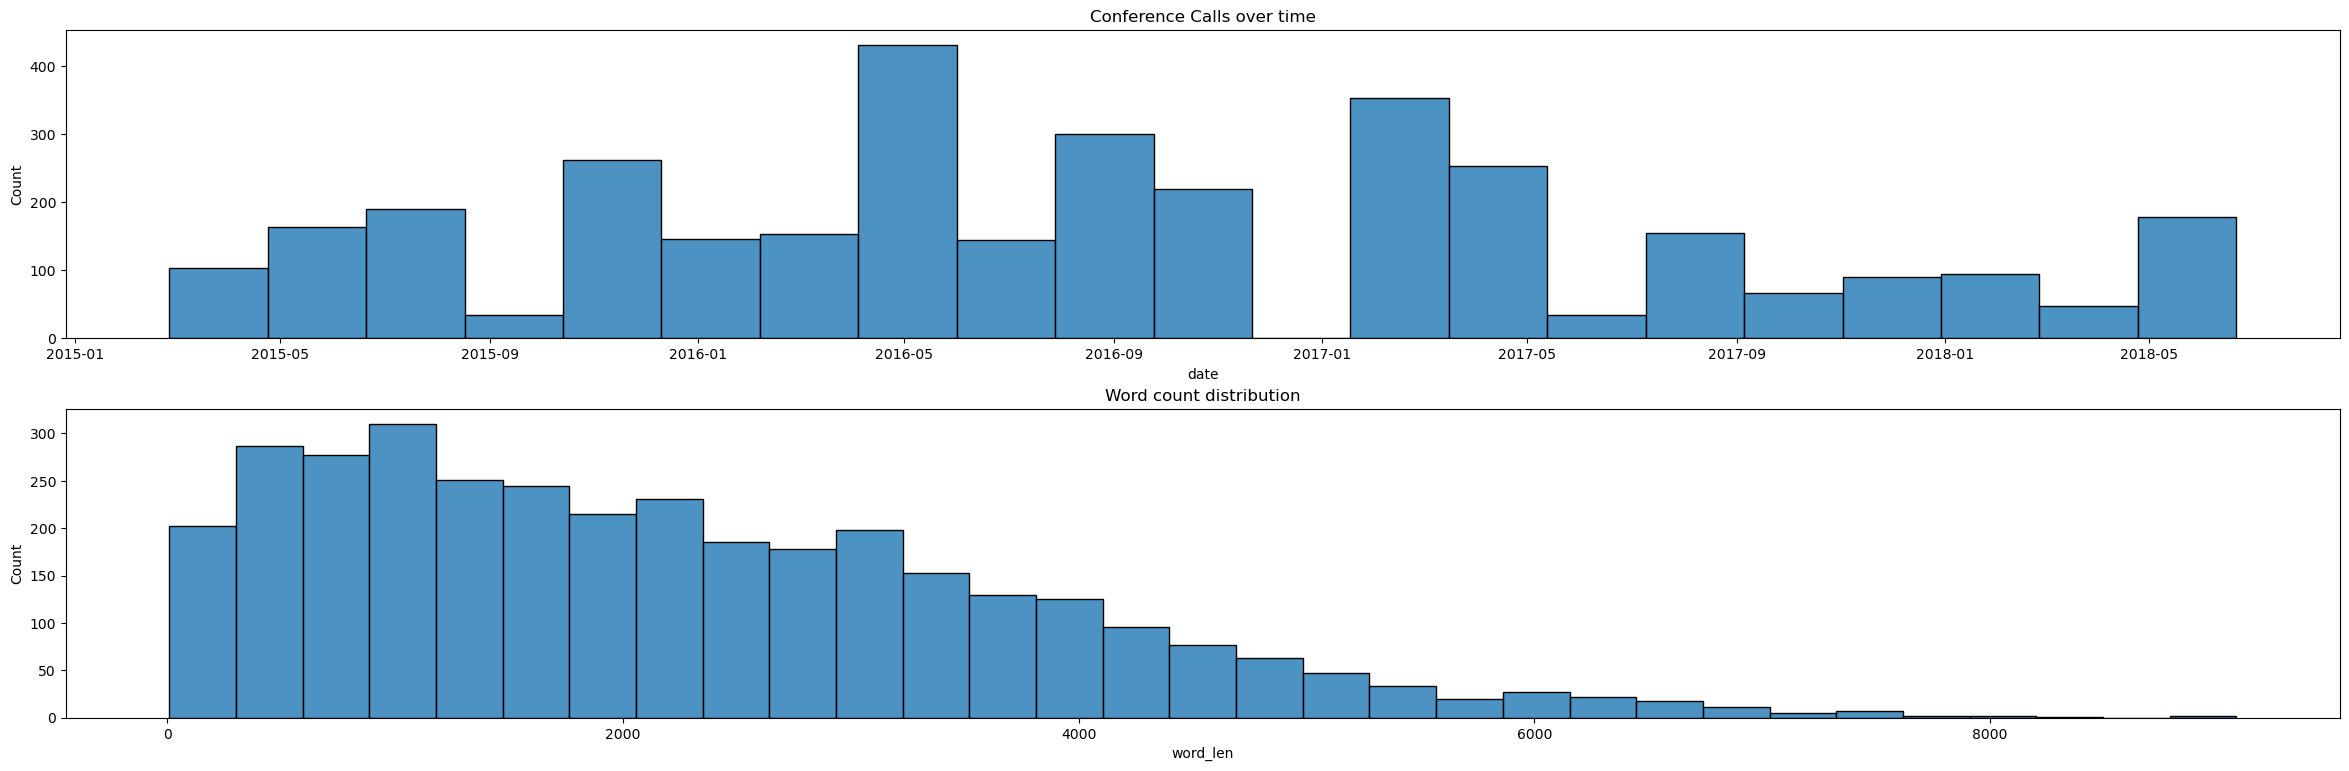

In [90]:
fig, axes = plt.subplots(2, 1, figsize=(24, 8))
fig.tight_layout(pad=3)

sns.histplot(
    ax=axes[0],
    data=transcripts_df, x="date",
    alpha=.8, linewidth=1,
)

sns.histplot(
    ax=axes[1],
    data=transcripts_df, x="word_len",
    alpha=.8, linewidth=1,
)

_ = axes[0].set_title('Conference Calls over time')
_ = axes[1].set_title('Word count distribution')

#### Text pre-processing

The same normalize_text function is used here on the conference calls data.

In [91]:
transcripts_df['preproc_lst'] = (
    transcripts_df['text']
    .astype(str)
    .progress_apply(lambda row: normalize_text(row))
)

transcripts_df['preproc'] = [' '.join(word) for word in transcripts_df['preproc_lst']]

100%|██████████| 3419/3419 [01:59<00:00, 28.55it/s]


#### Wordcloud

In [92]:
full_transcripts=np.hstack(transcripts_df['preproc_lst'])
full_transcripts = Counter(full_transcripts)

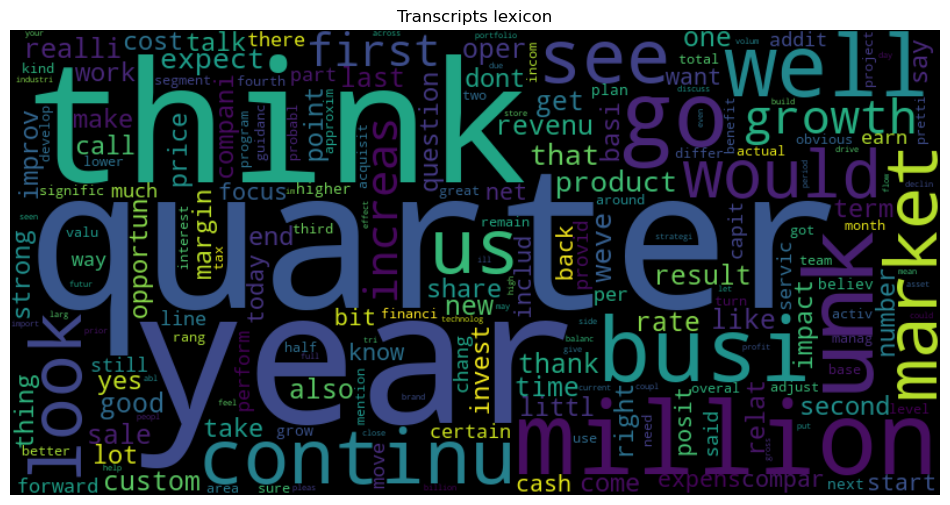

In [93]:
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(full_transcripts)

fig, _ = plt.subplots(1,1,figsize=(12,10))
plt.imshow(wc, interpolation = 'bilinear')
_.set_title('Transcripts lexicon')
plt.axis("off")
plt.show()

### Political Risk measure on transcripts

We now have a custom-built dictionary of non-economic political bigrams, a set of risk synonyms and pre-processed conference call transcripts. The sensible next step is to perform the same analysis done in the simpler example above, but on the whole corpus of call transcripts. We will use the dataframe of pre-processed call transcripts and apply the different list comprehension and mapping functions on each row.

Before applying the steps, we collect one of them in a function in order to make the row-wise apply more readable. The function defined corresponds to whether a political bigram is less than ten 'word positions' away from a risk synonym in either direction, namely:

In [94]:
def abs_ind(ind_poli, ind_risk):
    '''Finds dictionary words that are in close proximity of a risk word'''
    ind_both = []
    for i in ind_poli:
        for j in ind_risk:
            if abs(i-j) < 10:
                ind_both.append(i)
    return list(sorted(set(ind_both)))

Now we can assign to the transcripts dataframe a series of columns that collect each of the objects defined previously, from bigrams, to index positions and when these indices are in close proximity to each other.

In [95]:
transcripts_df = (
    transcripts_df
    .assign(
        
        # Create bigrams from each conference call transcript
        bigrams=lambda df: df.preproc.progress_apply(lambda row: [b for b in list(map(' '.join, zip(row.split(' ')[:-1], row.split(' ')[1:])))]),
        
        # Identify bigrams that are included in the political, non-economic dictionary
        ind_poli=lambda df: df.bigrams.progress_apply(lambda row: [i for i, x in enumerate(row) if x in words_polrisk]),
        
        # Identify bigrams that include a risk synonym
        ind_risk=lambda df: df.bigrams.progress_apply(lambda row: [i for i, x in enumerate(row) if any(xx in x for xx in risk_syn)]),
        
        # Apply indicator variable function (code cell above)
        idx_both=lambda df: df.progress_apply(lambda row: abs_ind(row.ind_poli, row.ind_risk), axis=1),
        
        # Get bigrams for which the indicator variable is 1
        ind_both=lambda df: df.progress_apply(lambda row: [x for i, x in enumerate(row.bigrams) if i in row.idx_both], axis=1),
        
        # Sum bigram weights and normalize over document weight
        pol_risk=lambda df: df.progress_apply(lambda row: sum([word_weights[x] for x in row.ind_both])/len(row.bigrams), axis=1)
    )
)

  0%|          | 0/3419 [00:00<?, ?it/s]

100%|██████████| 3419/3419 [00:00<00:00, 24775.53it/s]


We can have a first look at how some of the results might look like. Let's define a function that colors text if words are part of a bigram in either the political dictionary (blue) or the set of risk synonyms (red). 

In [96]:
def col_pol(text, indicator_pol, indicator_risk):
    '''
    Color text according to risk/PN words
    '''
    cold_pol = text.split(' ')
    cold_pol = [
        colored(x, 'blue') if i in indicator_pol           # Color blue if word is in political dictionary
        else colored(x, 'blue') if i-1 in indicator_pol
        else x 
        for i, x in enumerate(cold_pol)
    ]
    
    cold_pol = [
        colored(x, 'red') if i in indicator_risk           # Color red if word is in risk dictionary
        else x 
        for i, x in enumerate(cold_pol)
    ]
    
    return ' '.join(cold_pol)

In [97]:
# Transcript with a large number of political risk matches
risk_max = transcripts_df.loc[transcripts_df.idx_both.str.len().idxmax()]
print(col_pol(risk_max.preproc, risk_max.ind_poli, risk_max.ind_risk))

thank unk good morn everyon line thank particip today call appreci time interest matador much addit earn press releas issu yesterday would like remind everyon find short slide present summar highlight firstquart  earn releas websit present webcast page websit investor tab would like introduc senior member oper staff join morn stand question may unk unk presid unk unk execut vice presid chief financi offic craig adam execut vice presid land legal administr van singleton execut vice presid land unk unk senior vice presid reservoir engin chief technolog offic unk unk senior vice presid oper unk unk senior vice presid head market midstream unk spicer vice presid general manag midstream trent green vice presid product rob unkalik vice presid chief account offic turn call question want briefli highlight key point first quarter felt progress consist guidanc project provid analyst day first highlight increas prove oil natur gas reserv  year year  million boe increas prove oil reserv  year year

In [98]:
# Some of the transcripts with the highest scores of political risk
print(transcripts_df.sort_values(by=['pol_risk'], ascending=False)[:5]['text'].values)

['<UNK>, we are not saying there is no risk but we feel good about the things that we can do here to have a better back half. Okay. '
 "Thanks for the question. In addition to working with the visuals, as Pat mentioned, we are going to continue just to review our paid search programs, as well as looking at strengthening our re-targeting services through display and new acquisition, while making sure that we're watching our e-mail list attrition rate and being wise in how we're spending our dollars there on marketing perspective. And the only thing I can think to add there is we do have the same overlap on to our e-mail approach, which I think is working well. Yes, good morning, <UNK>. It's possible that there could be another one or two added, but for planning stages, it's getting a little late, so I would -- my best guess is that we'll stay at nine. Yes. Okay, with no other calls coming in then or questions coming up, we would like to thank everybody for joining us today and wish ever

#### Non-Economic Political Risk Plot

While the sample of transcripts is clearly insufficient to be fully meaningful, we can still have a glimpse of how the index evolves over time.

c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

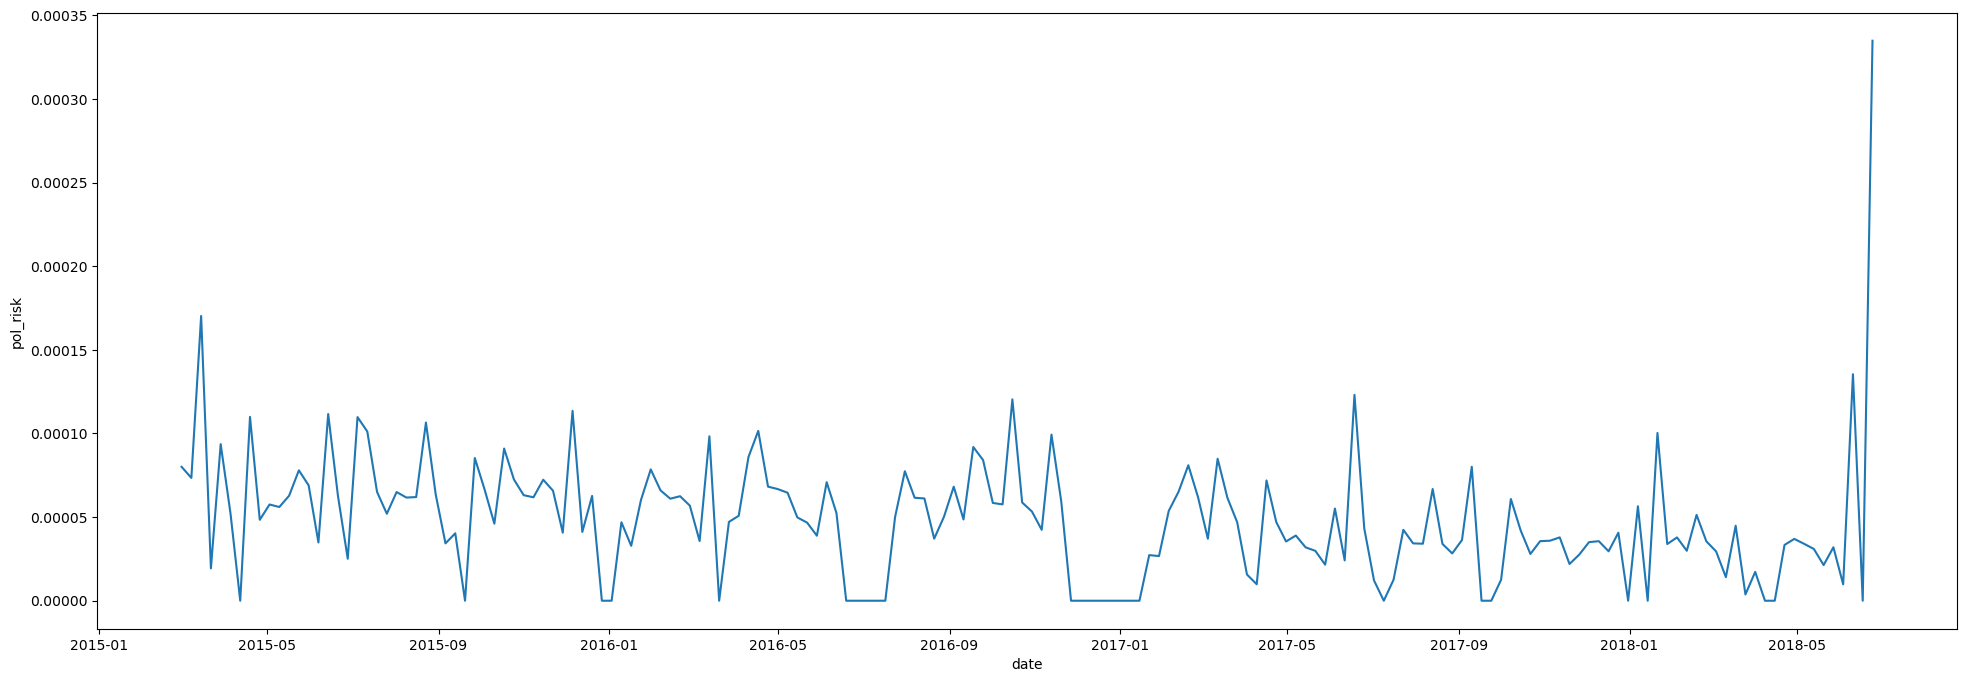

In [99]:
plt_df = (
    transcripts_df
    .resample('W', on='date')
    .pol_risk.mean()
    .reset_index()
    .assign(
        pol_risk=lambda df: df.pol_risk.fillna(0),
        date=lambda df: df.date.dt.date
    )
)

plt.figure(figsize=(24,8))
ax = sns.lineplot(x='date', y='pol_risk', data=plt_df)

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

# Topic Modelling and Latent Dirichlet Allocation

This section presents some of the text analysis performed in the QJE's paper written by Stephen Hansen, Michael McMahon and Andrea Prat and published in 2018. A link to the article can be found [here](https://www.federalreserve.gov/monetarypolicy/fomc_historical_year.htm).

The paper analyzes how making the Federal Reserve monetary policy meetings more **transparent** affects policymakers' incentives and their between-peer discussions. The study is motivated by an ambiguous answer to that question, as theory highlights two potential channels through which transparency can affect performance:
- **Discipline**: Enhanced transparency may incentivize effort and relevant contributions
- **Conformity**: Enhanced transparency may discourage broad and creative debate

The authors exploit a change in the Federal Reserve's disclosure policy in 1993 to identify changes in behavior linked to the release of FOMC minutes data hitherto undisclosed. A simple natural experiment set-up with which authors are able to observe some interesting patterns:

- Inexperienced members show increased discipline and an enhanced focus on quantitative subjects when discussing economic prospects
- These same members engage in conformity when discussing tangible policy actions
- Overall, the former effect seems to dominate

### Background

- The FOMC is the main policy body of the Federal Reserve System and meets eight times a year to draft monetary policy
- Although the meetings were recorded, prior to 1993 it was believed that these recordings where destroyed
- However, Greenspan 'discovered' in 1993 that these were first transcribed and only then destroyed
- Within months of the revelation, the Fed agreed to publish all past transcripts and to release any transcripts henceforth with a five-year lag

The data is presented and pre-processed here, but the application of topic modeling is left as a take-home exercise. In the spirit of the paper, try to run the LDAMallet algorithm in the text below, and see how different topics dominated talks at the FOMC over time and before-after cases of financial distress.

### Build dataframe

Including in this script is a list of years containing transcripts from all FOMC meetings. These are readily available [here](https://www.federalreserve.gov/monetarypolicy/fomc_historical_year.htm). In order to keep the focus of the class narrow, steps to scrape the webpage and the use of OCR to transform to txt format are omitted here, but I can provide the script upon request. 

In [100]:
hansendir = datadir / 'hansen'

In [101]:
# Fetch all paths where the transcripts are stored
dict_transcripts = {}                                                 # A dictionary to feed

for year in range(1982, 2008):
    
    transcripts = []                                                  # A list to feed
    
    pwd = str(hansendir) + '/' + str(year)                            # Update print working directories

    year_transcripts = os.walk(pwd)                                   # Walk into year-specific print working directory
    
    for item in year_transcripts:                                     # (Actually it only finds one per year)
        for file in item[2]:                                          # Iterate over individual files found in a given pwd
            transcripts.append(str(item[0]) + "/" + file)             # Append to dictionary
    dict_transcripts[str(year)] = transcripts                         # Feed list
    
transcript_list = []                                                  # A list to feed using dictionary

for item in dict_transcripts.values():                                # Iterate over dictionary
    transcript_list += item                                           # Add key and value to list
    
transcript_list = sorted(transcript_list)                             # Sort transcripts

print("Length of Documents:", len(transcript_list))

Length of Documents: 209


In [102]:
# A look at the body of the first document
infile = open(transcript_list[0], encoding="utf8")                    # Built-in function to open txt files
text = infile.readlines()                                             # Return all lines as a list

text = [line.strip() for line in text]                                # Remove any spacing either side of each line
text = ' '.join(text)                                                 # Join lines using a space as separator

print(text[:5000])                                                    # Print

Meeting of the Federal Open Market Committee February 1-2, 1982  A meeting of the Federal Open Market Committee was held in the offices of the Board of Governors of the Federal Reserve System in Washington, D. C., starting on Monday, February 1, 1982, at 2:30 p.m. and continuing on Tuesday, February 2, 1982, at 9:00 a.m. PRESENT:  Mr. Volcker, Chairman Mr. Solomon, Vice Chairman Mr. Boehne Mr. Boykin Mr. Corrigan Mr. Gramley Mr. Keehn Mr. Partee Mr. Rice Mr. Schultz Mrs. Teeters Mr. Wallich Messrs. Balles, Black, Ford, Timlen, and Winn, Alternate Members of the Federal Open Market Committee Messrs. Guffey, Morris, 1/ and Roos, Presidents of the Federal Reserve Banks of Kansas City, Boston, and St. Louis, respectively Mr. Axilrod, Staff Director Mr. Altmann, Secretary Mr. Bernard, Assistant Secretary Mrs. Steele, Deputy Assistant Secretary Mr. Bradfield, General Counsel Mr. Mannion, Assistant General Counsel Mr. Kichline, Economist Messrs. Burns, Ettin, 2/ Mullineaux, Prell, Scheld, Tru

These txt documents require significant text processing before applying the same tools defined in previous sections. In the loop below, we will read each document, split it into rows whenever the upper-case name of a FOMC member is displayed and create a dataframe with rows being each member, the statement they make, and the date of the meeting they made it at. Note: we forego the discussion over *when* in the meeting comments were made, which is an instrumental part of the Hansen paper.

In [103]:
# Create large dataframe that splits statements and assigns author
appended_data = []                                                    # List to feed

for item in tqdm(transcript_list):

    infile = open(item, encoding="utf8")                              # Built-in function to open txt files
    text = infile.readlines()                                         # Return all lines as a list

    text = [line.strip() for line in text]                            # Remove any spacing either side of each line
    text = ' '.join(text)                                             # Join lines using a space as separator

    # Split text on any FOMC member being named using upper-case. Then store name and subsequent paragraph until next split
    splits=re.split('(?=MS. [A-Z]+.|MR. [A-Z]+.|CHAIRMAN [A-Z]+.|VICE CHAIRMAN [A-Z]+.|SPEAKER\(\?\))(MS. [A-Z]+.|MR. [A-Z]+.|CHAIRMAN [A-Z]+.|VICE CHAIRMAN [A-Z]+.|SPEAKER\(\?\))',text)
    
    dft=splits[1:-20]                                                 # Ignore first paragraph (intro) and end-document noise

    member, statement = dft[::2], dft[1::2]                           # Split in two lists (recall arguments [start:end:step])

    dft = list(zip(member, statement))                                # Join them again as tuples (member-statement pairs)

    dft = pd.DataFrame(dft,columns = ['member','statement'])          # Transform into a Pandas DataFrame
    dft['date'] = re.search('FOMC(\d+)meeting',item).group(1)         # Store the date of the meeting (using regex in file name)

    appended_data.append(dft)                                         # Append data to the list
    
appended_data = pd.concat(appended_data)                              # Concatenate all pandas DF stored in the list

100%|██████████| 209/209 [00:02<00:00, 72.82it/s]


In [104]:
appended_data.head(20)

member  \
0        CHAIRMAN VOLCKER.   
1   VICE CHAIRMAN SOLOMON.   
2              MR. ZEISEL.   
3        CHAIRMAN VOLCKER.   
4              MR. ZEISEL.   
5        CHAIRMAN VOLCKER.   
6              MR. ZEISEL.   
7             MR. GRAMLEY.   
8              MR. ZEISEL.   
9        CHAIRMAN VOLCKER.   
10            MR. SCHULTZ.   
11       CHAIRMAN VOLCKER.   
12            MR. SCHULTZ.   
13       CHAIRMAN VOLCKER.   
14             MR. ZEISEL.   
15  VICE CHAIRMAN SOLOMON.   
16             MR. ZEISEL.   
17       CHAIRMAN VOLCKER.   
18            MR. WALLICH.   
19           MR. KICHLINE.   

                                                                                                                                                                                                  statement  \
0                                                                                                Do we have any comments or questions on how these people see things? I have a question. I understand that    
1    in most or all of these new wage agreements that are coming in at much lower levels, such as the Teamsters and others, there is for the first time a clause indicating that labor can reopen the co...   
2    Yes, it is apparently a fairly common part of a limited number of such agreements so far, and one can understand why. In a sense it's one of the things the union is trading away; that is, the uni...   
3                                                                     You have the line for compensation per hour going down pretty steeply; it's all in the future. What gives you that great confidence?    
4    Well, it's not entirely in the future, but We did have a you're perfectly right that in large degree it is. As I noted in my reduction in compensation over this past year. presentation, I think o...   
5              The Federal Reserve had a bigger increase in compensation [and is] looking forward to a bigger increase in compensation on some catch-up theory. How many other people are engaged in that?    
6                                                                                                                                                                                                             
7                                                                                                                    Well, it's hard to know, but one can-The Federal Reserve's recession hasn't hit yet!     
8                                     The kinds of adjustments that President Solomon mentioned a few minutes ago suggest that we finally are getting the wage adjustments that we were really hoping for.    
9    Yes, we see some signs of this, and some wage agreements that are reported in the newspapers suggest that some industries are under very heavy pressure. But I do hear a lot about other industries...   
10                                                                                                                                                                                         I'm delighted.     
11                                                                                                                                                                   You'll have to explain that comment.     
12                                                                         Well, we do studies to see what the comparable salaries are out there. And when comparable salaries go up, why it's consistent.    
13                                                                                                                                 They will be looking at ours and then we will be in the hole next year!    
14   You're perfectly right. In analyzing those industries where institutional wage adjustments remain [to be made], they did tend to be characterized--in industries that were under very substantial p...   
15   I'd like to offer a thesis. As I see the data, the services sector part 

### Checks

We perform some minor checks, validating the text splitting process above and discarding too-short sentences that hardly contribute to the analysis of the meeting. 

In [105]:
print('Size:', appended_data.shape)

# Duplicates, NAN
print('Duplicated entries:', appended_data.duplicated().any())
appended_data.head(5)

Size: (76080, 3)
Duplicated entries: True


member  \
0       CHAIRMAN VOLCKER.   
1  VICE CHAIRMAN SOLOMON.   
2             MR. ZEISEL.   
3       CHAIRMAN VOLCKER.   
4             MR. ZEISEL.   

                                                                                                                                                                                                 statement  \
0                                                                                               Do we have any comments or questions on how these people see things? I have a question. I understand that    
1   in most or all of these new wage agreements that are coming in at much lower levels, such as the Teamsters and others, there is for the first time a clause indicating that labor can reopen the co...   
2   Yes, it is apparently a fairly common part of a limited number of such agreements so far, and one can understand why. In a sense it's one of the things the union is trading away; that is, the uni...   
3                                                                    You have the line for compensation per hour going down pretty steeply; it's all in the future. What gives you that great confidence?    
4   Well, it's not entirely in the future, but We did have a you're perfectly right that in large degree it is. As I noted in my reduction in compensation over this past year. presentation, I think o...   

       date  
0  19820202  
1  19820202  
2  19820202  
3  19820202  
4  19820202

In [106]:
# Keep only rows with more than 50 characters
appended_data = appended_data.loc[appended_data['statement'].str.len() >=50].reset_index(drop = True)

In [107]:
print('Size:', appended_data.shape)

# Duplicates, NAN
print('Duplicated entries:', appended_data.duplicated().any())

Size: (50601, 3)
Duplicated entries: True


In [108]:
# Number of duplicated entries
print('Number of duplicated entries:',len(appended_data.loc[appended_data.duplicated() == True]))

# Drop the two odd observations
appended_data = appended_data.loc[appended_data.duplicated() == False]

Number of duplicated entries: 2


c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


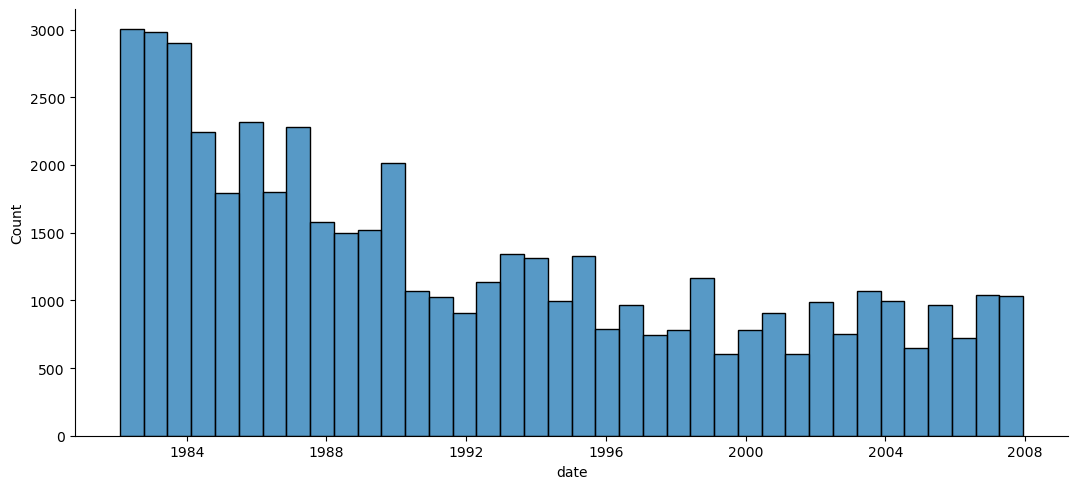

In [109]:
# Visualize distribution of statements - Create datetime column
appended_data['date'] = pd.to_datetime(appended_data['date'], format='%Y%m%d')

# Visualize distribution of statements - Histogram plot
sns.displot(appended_data, x="date", aspect=18/8.27)

## Text Pre-Processing

The script above fetched all FOMC transcripts and appended them in a single, tractable dataframe. The next natural step in all text analysis applications, and something by now we should be familiar with, is to pre-process the corpus of data. Note that, in order to streamline our text pre-processing tasks and keep the code light, we omit the part-of-speech tagger process described in section IV. B of the paper. In case you are interested, you can find a more detailed description [here](https://nlp.stanford.edu/pubs/tagging.pdf) and an NLTK implementation [here](http://www.nltk.org/book/ch05.html).

In [110]:
# Pre-processing steps
remove_punct = str.maketrans('','','!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”’©')
stop_words = stopwords.words('english')
stop_words.append('think')
stemmer      = SnowballStemmer('english')

In [111]:
# Pre-processing function
def normalize_text(doc):
    """Takes documents as input and outputs clean tokens"""
    
    doc        = doc.replace('</br>', ' ')
    lower      = doc.lower()                                             # all lower case
    nopunc     = lower.translate(remove_punct)                           # remove punctuation
    words      = nopunc.split()                                          # split into tokens
    nostop     = [w for w in words if w not in stop_words]               # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop]         # normalize numbers
    stem_text  = [stemmer.stem(w) for w in no_numbers]                   # stem each word
    
    return stem_text

In [112]:
# Pass all statements through the pre-processing function
statements = []                                                          # Create list to feed

for doc in tqdm(appended_data['statement']):                             # Iterate over statement-sized documents
    
    raw_wip = normalize_text(doc)                                        # Call in normalize_text function on doc
    statements.append(raw_wip)                                           # Append to list
    
statements_clean = [" ".join(item) for item in statements]               #Convert each string-list to an actual string
print(type(statements_clean), len(statements_clean))

# Create additional column in the speeches DF that is the pre-processed speeches
appended_data["preproc"] = statements_clean                     # Create column in DataFrame containing list

100%|██████████| 50599/50599 [01:22<00:00, 615.11it/s] 


<class 'list'> 50599


In [113]:
# Check a handful of rows in our pre-processed corpus
appended_data.head(10)

member  \
0       CHAIRMAN VOLCKER.   
1  VICE CHAIRMAN SOLOMON.   
2             MR. ZEISEL.   
3       CHAIRMAN VOLCKER.   
4             MR. ZEISEL.   
5       CHAIRMAN VOLCKER.   
6            MR. GRAMLEY.   
7             MR. ZEISEL.   
8       CHAIRMAN VOLCKER.   
9            MR. SCHULTZ.   

                                                                                                                                                                                                 statement  \
0                                                                                               Do we have any comments or questions on how these people see things? I have a question. I understand that    
1   in most or all of these new wage agreements that are coming in at much lower levels, such as the Teamsters and others, there is for the first time a clause indicating that labor can reopen the co...   
2   Yes, it is apparently a fairly common part of a limited number of such agreements so far, and one can understand why. In a sense it's one of the things the union is trading away; that is, the uni...   
3                                                                    You have the line for compensation per hour going down pretty steeply; it's all in the future. What gives you that great confidence?    
4   Well, it's not entirely in the future, but We did have a you're perfectly right that in large degree it is. As I noted in my reduction in compensation over this past year. presentation, I think o...   
5             The Federal Reserve had a bigger increase in compensation [and is] looking forward to a bigger increase in compensation on some catch-up theory. How many other people are engaged in that?    
6                                                                                                                   Well, it's hard to know, but one can-The Federal Reserve's recession hasn't hit yet!     
7                                    The kinds of adjustments that President Solomon mentioned a few minutes ago suggest that we finally are getting the wage adjustments that we were really hoping for.    
8   Yes, we see some signs of this, and some wage agreements that are reported in the newspapers suggest that some industries are under very heavy pressure. But I do hear a lot about other industries...   
9                                                                         Well, we do studies to see what the comparable salaries are out there. And when comparable salaries go up, why it's consistent.    

        date  \
0 1982-02-02   
1 1982-02-02   
2 1982-02-02   
3 1982-02-02   
4 1982-02-02   
5 1982-02-02   
6 1982-02-02   
7 1982-02-02   
8 1982-02-02   
9 1982-02-02   

                                                                                                                                                                                                   preproc  
0                                                                                                                                                     comment question peopl see thing question understand  
1  new wage agreement come much lower level teamster other first time claus indic labor reopen contract know condit improv industri extent like recoveri start bring sharp revers downward trend labor ...  
2  yes appar fair common part limit number agreement far one understand sens one thing union trade away union will accept general reduc fix rate increas wage lean heavili let say cost live adjust wan...  
3                                                                                                                                          line compens per hour go pretti steepli futur give great confid  
4  well entir futur your perfect right larg degre note reduct compens past year present one look compens figur wage rate figur littl wage figur behind # improv somewhat compens last year billion soci...  
5                        

## LDA - Gensim

The key idea with topic modeling is the assumption that documents exhibit each category (or topic) in some proportion, which we would like to learn from the data. Given that what we observe are only the words, we further assume that each topic is a distribution over words, and that by exploiting the relationship between documents containing topics and topics containing words, we can use our observed documents and words to infer the topic. Topic modeling thus estimates the topic-document distribution and the word-topic distribution using Bayesian inference techniques in order to find the latent thematic structure in the text. Simply put, the model aims to use the observed words to infer hidden topics.

Crucially, LDA places symmetric Dirichlet priors over the two distributions. [Intuitively](https://en.wikipedia.org/wiki/Dirichlet_distribution), these priors allow documents to contain few topics and topics to use only a handful of words frequently. The resulting Dirichlet distribution can be thought of as a distribution of distributions, which assigns word-to-topic and topic-to-document probabilities. 

![plate](https://scikit-learn.org/stable/_images/lda_model_graph.png)

The parameters above can be described as:
- $D$ denotes the number of documents in our corpus-
- $K$ denotes the number of topics we exogenously chose for our data.
- $V$ refers to the vocabulary of words in our corpus.
- $N_d$ is the number of words a given document $d$ has.
- $w_{d,n}$ refers to each word in document $d$ and indexed in $N_d$ as $n$.
- $z_{d,n}$ is the topic assignment for word $n$ in document $d$, which is drawn from a multinomial distribution.
- $\theta_d$ is the topic distribution for document $d$, a probability vector or multinomial distribution over topics.
- $\beta_k$ is the word distribution for topic $k$, a probability vector over words.

An in-depth discussion over LDA is beyond the purposes of this notebook. In case you're interested in a similar replication that describes the method, see [here](https://github.com/ampudia19/5-Day-NLP-Course/blob/main/Day4/Day4.ipynb).

### LDA implementation

Luckily for us, we can implement high-level LDA algorithms using some of python's most well-known libraries. We will use <code>gensim</code> in this section, but it's worth pointing out <code>sklearn</code> has their [own implementation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) of the Bayesian algorithm. 

Let's begin by importing some of gensim's associated modules.

In [114]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

Gensim has a very particular way of processing data, which requires specific knowledge of the library. More than with other packages, a quick look at the relevant pages in the [documentation](https://radimrehurek.com/gensim/) can be helpful.

First, we will gather our appended FOMC transcripts data and split them again in tokens. 

In [115]:
hansen_texts = appended_data.preproc.str.split().tolist()

In [116]:
print(hansen_texts[1][:50])

['new', 'wage', 'agreement', 'come', 'much', 'lower', 'level', 'teamster', 'other', 'first', 'time', 'claus', 'indic', 'labor', 'reopen', 'contract', 'know', 'condit', 'improv', 'industri', 'extent', 'like', 'recoveri', 'start', 'bring', 'sharp', 'revers', 'downward', 'trend', 'labor', 'cost']


We use n-grams rather than single words. The following steps compute the n-grams, define a gensim-specific dictionary of corpora and creates tuple lists with bigrams, their unique gensim identifiers and their document frequencies.

In [117]:
# Creating bigrams, trigrams (these steps are quite cumbersome. 
# Step 1) Define model, Step 2) Minimal functionality for trained model, Step 3) Feed our text data to the trained model

# Compute scores and store n-gram combinations
bigram = gensim.models.Phrases(hansen_texts, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[hansen_texts], threshold=100)  

# Exports the trainer model = uses less RAM, faster processing. Model updates no longer possible
bigram_model = gensim.models.phrases.Phraser(bigram)
trigram_model = gensim.models.phrases.Phraser(trigram)

In [118]:
# Pass our text data through the models
texts_bigrams = [bigram_model[doc] for doc in hansen_texts]
texts_trigrams = [trigram_model[doc] for doc in hansen_texts]

In [119]:
# Create Gensim Dictionary
gen_dict = corpora.Dictionary(texts_trigrams)
texts = texts_trigrams
corpus = [gen_dict.doc2bow(item) for item in texts]

The last object represents the input to the LDA model. Gensim packs in nested lists tuples corresponding to each word's given index in a document and its document-specific frequency. The actual word can be retreived by indexing from <code>gen_dict</code>, so that:

In [120]:
[[(gen_dict[i], freq) for i, freq in doc] for doc in corpus[1:2]]

[[('agreement', 1),
  ('bring', 1),
  ('claus', 1),
  ('come', 1),
  ('condit', 1),
  ('contract', 1),
  ('cost', 1),
  ('downward', 1),
  ('extent', 1),
  ('first', 1),
  ('improv', 1),
  ('indic', 1),
  ('industri', 1),
  ('know', 1),
  ('labor', 2),
  ('level', 1),
  ('like', 1),
  ('lower', 1),
  ('much', 1),
  ('new', 1),
  ('other', 1),
  ('recoveri', 1),
  ('reopen', 1),
  ('revers', 1),
  ('sharp', 1),
  ('start', 1),
  ('teamster', 1),
  ('time', 1),
  ('trend', 1),
  ('wage', 1)]]

### Model

All we need to do now is actually call gensim's LDA model and feed it the processed corpus of text we obtained above. Note that gensim's main application of LDA uses variational inference, which is much faster than the traditional Gibbs Sampler but which can yield poorer results and thus requires much more fine tuning.

In [121]:
# Number of topics
K = 20

# LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus, # stream of document vectors
    id2word=gen_dict, # Mapping from word IDs to words
    num_topics= K, # Number of pre-defined topics
    random_state = 42, # For reproducibility
    update_every=10, # Number of documents to be iterated through for each update
    chunksize=1000,
    passes=2,
    alpha='auto', # try 'auto' to allow gensim to learn alpha
    per_word_topics=False
)

#### Alternative - Gibbs Sampler using MALLET

An alternative implementation uses MALLET, a Java-based toolkit for NLP that includes a Gibbs Sampling LDA. Gensim's wrapper of MALLET, unfortunately, was deprecated in version 3.8.1. The process is **considerably slower** but can be shown to generally yield better Bayesian estimates of the latent variables (in our example, topic compositions of a set of news articles).

The fact that it's no longer supported by gensim means that a cumbersome process is required to make it work. Firstly, gensim 3.8.1 should be installed, and not older versions. Note that because of changes in numpy, working with gensim 3.8.1 (which uses numpy, as most packages do) requires an old version of numpy. For example, numpy 1.20.1 version will work with gensim 3.8.1, but not the 1.19.5 or 1.21.0 versions. 

Additionally, you need to **(i)** separately [download MALLET](http://mallet.cs.umass.edu) and **(ii)** correctly set the path to it. Gensim's 3.8.1 [documentation](https://radimrehurek.com/gensim_3.8.3/models/wrappers/ldamallet.html) has an example of how to get the wrapper of MALLET to work, and includes the link to download MALLET. Make sure that if you attempt to use MALLET you follow the download instructions as well as gensim's set-up documentation carefully. To activate the cells, select them and press Y.


In [122]:
# # In this example, the utils folder contains MALLET 2.0.8 
# os.environ.update({'MALLET_HOME': str(utildir / 'mallet-2.0.8')})
# mallet_path = str(utildir / 'mallet-2.0.8' / 'bin' / 'mallet') 

In [123]:
# from gensim.models.wrappers.ldamallet import LdaMallet

# K = 20

# ldamallet = LdaMallet(
#    mallet_path, corpus=corpus, num_topics=K, id2word=gen_dict,
# )

In [124]:
# lda_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

### Results

In [125]:
from pprint import pprint

pprint(lda_model.show_topics(num_topics=K, formatted=True))

[(0,
  '0.014*"well" + 0.014*"m2" + 0.013*"rate" + 0.013*"growth" + 0.012*"one" + '
  '0.011*"say" + 0.011*"im" + 0.011*"#" + 0.010*"year" + 0.010*"aggreg"'),
 (1,
  '0.024*"would" + 0.011*"secur" + 0.010*"#" + 0.010*"dont" + 0.008*"get" + '
  '0.008*"know" + 0.008*"issu" + 0.008*"go" + 0.007*"make" + 0.007*"reset"'),
 (2,
  '0.045*"#" + 0.025*"would" + 0.020*"growth" + 0.015*"percent" + 0.010*"rate" '
  '+ 0.009*"go" + 0.008*"say" + 0.008*"well" + 0.007*"like" + 0.007*"get"'),
 (3,
  '0.027*"swap" + 0.024*"would" + 0.023*"line" + 0.019*"#" + 0.012*"top_panel" '
  '+ 0.009*"go" + 0.009*"bottom_panel" + 0.009*"time" + 0.008*"dont" + '
  '0.008*"im"'),
 (4,
  '0.021*"would" + 0.019*"bank" + 0.015*"reserv" + 0.014*"#" + 0.009*"term" + '
  '0.008*"facil" + 0.008*"institut" + 0.008*"want" + 0.008*"market" + '
  '0.007*"overnight"'),
 (5,
  '0.016*"would" + 0.015*"go" + 0.011*"dont" + 0.011*"well" + 0.010*"#" + '
  '0.007*"mr" + 0.007*"say" + 0.006*"know" + 0.006*"get" + 0.006*"number"'),
 (

We can now extract some information about the topic distribution of each statement made by a FOMC member. Firstly, we create in topic_list where for each statement the most likely topic is assigned. Simultaneously, we create a list of keywords for each topic.

In [126]:
# Top result (dominant topic) and top words (ie, each word in corpus, select highest probability) per FOMC member comment

# Dominant topic
topic_list = [sorted(statement, key=lambda x: (x[1]), reverse=True)[0][0] for statement in lda_model[corpus]]

# Dictionary {'topic':'words that mostly belong to that topic'}
topic_keywords = {}

for topic in range(K):
    keyswds = lda_model.show_topic(topic)
    keyswds = ", ".join([word for word, _ in keyswds])
    topic_keywords[topic] = keyswds

We also create a dictionary that will be used to populate a dataframe for each statement and the topic distribution.

In [127]:
# Topic probabilities for each token (FOMC member statement)
dict_topics = {i: dict(statement) for i, statement in enumerate(lda_model[corpus])}

We use the dictionary in a list comprehension to create row i (statement i) with topic distributions stored in dict_topics[i].

In [128]:
# Build dataframe with results.
topics_df = pd.DataFrame.from_dict(
    {i: dict_topics[i] 
    for i in dict_topics.keys()
    },
    orient='index'
)

topics_df = topics_df.reindex(sorted(topics_df.columns), axis=1)

We can then add the dominant topics, the keywords and the original text to get an idea of the performance of the model.

In [129]:
# Add results to original dataframe
appended_data['topic'] = topic_list
appended_data['topic_kwds'] = appended_data['topic'].map(topic_keywords)

# Somewhere two rows are dropped, we reset index for merge below
appended_data.reset_index(drop=True, inplace=True)

appended_data = pd.merge(appended_data, topics_df, left_index=True, right_index=True)

In [130]:
for i in range(40):
    appended_data.rename(columns={i: 'Topic' + str(i)}, inplace=True)

In [131]:
appended_data.head(5)

member  \
0       CHAIRMAN VOLCKER.   
1  VICE CHAIRMAN SOLOMON.   
2             MR. ZEISEL.   
3       CHAIRMAN VOLCKER.   
4             MR. ZEISEL.   

                                                                                                                                                                                                 statement  \
0                                                                                               Do we have any comments or questions on how these people see things? I have a question. I understand that    
1   in most or all of these new wage agreements that are coming in at much lower levels, such as the Teamsters and others, there is for the first time a clause indicating that labor can reopen the co...   
2   Yes, it is apparently a fairly common part of a limited number of such agreements so far, and one can understand why. In a sense it's one of the things the union is trading away; that is, the uni...   
3                                                                    You have the line for compensation per hour going down pretty steeply; it's all in the future. What gives you that great confidence?    
4   Well, it's not entirely in the future, but We did have a you're perfectly right that in large degree it is. As I noted in my reduction in compensation over this past year. presentation, I think o...   

        date  \
0 1982-02-02   
1 1982-02-02   
2 1982-02-02   
3 1982-02-02   
4 1982-02-02   

                                                                                                                                                                                                   preproc  \
0                                                                                                                                                     comment question peopl see thing question understand   
1  new wage agreement come much lower level teamster other first time claus indic labor reopen contract know condit improv industri extent like recoveri start bring sharp revers downward trend labor ...   
2  yes appar fair common part limit number agreement far one understand sens one thing union trade away union will accept general reduc fix rate increas wage lean heavili let say cost live adjust wan...   
3                                                                                                                                          line compens per hour go pretti steepli futur give great confid   
4  well entir futur your perfect right larg degre note reduct compens past year present one look compens figur wage rate figur littl wage figur behind # improv somewhat compens last year billion soci...   

   topic  \
0     16   
1      8   
2     19   
3     17   
4     11   

                                                                    topic_kwds  \
0                     dont, go, say, laughter, know, that, im, would, one, way   
1  #, price, inflat, growth, forecast, increas, risk, economi, expect, continu   
2               #, would, year, go, market, exhibit, forecast, one, come, like   
3       committe, meet, issu, would, discuss, minut, #, oper, object, question   
4      year, #, quarter, revis, growth, first, next, project, second, forecast   

   Topic0  Topic1  Topic2    Topic3  ...   Topic10   Topic11   Topic12  \
0     NaN     NaN     NaN       NaN  ...       NaN       NaN       NaN   
1     NaN     NaN     NaN       NaN  ...       NaN       NaN       NaN   
2     NaN     NaN     NaN       NaN  ...  0.040577       NaN       NaN   
3     NaN     NaN     NaN  0.147765  ...       NaN       NaN       NaN   
4     NaN     NaN     NaN       NaN  ...       NaN  0.400977  0.124489   

   Topic13   Topic14   Topic15   Topic16   Topic17   Topic18   Topic19  
0      NaN  0.360889       NaN  0.556632       NaN       NaN       NaN  
1      NaN       NaN  0.251296       NaN       NaN       NaN       NaN  
2      NaN       NaN       NaN       NaN   

#### Topic-specific Wordcloud

For convenience-sake, the previous topic keywords created a single string that separated keywords with a comma. In this case, we use their weight in each topic to draw wordclouds out of them.

In [132]:
topic_keywords = {}

for topic in range(K):
    keyswds = lda_model.get_topic_terms(topicid=topic, topn=500)
    keyswds = {gen_dict[w_id]: freq for w_id, freq in keyswds}
    topic_keywords[topic] = keyswds

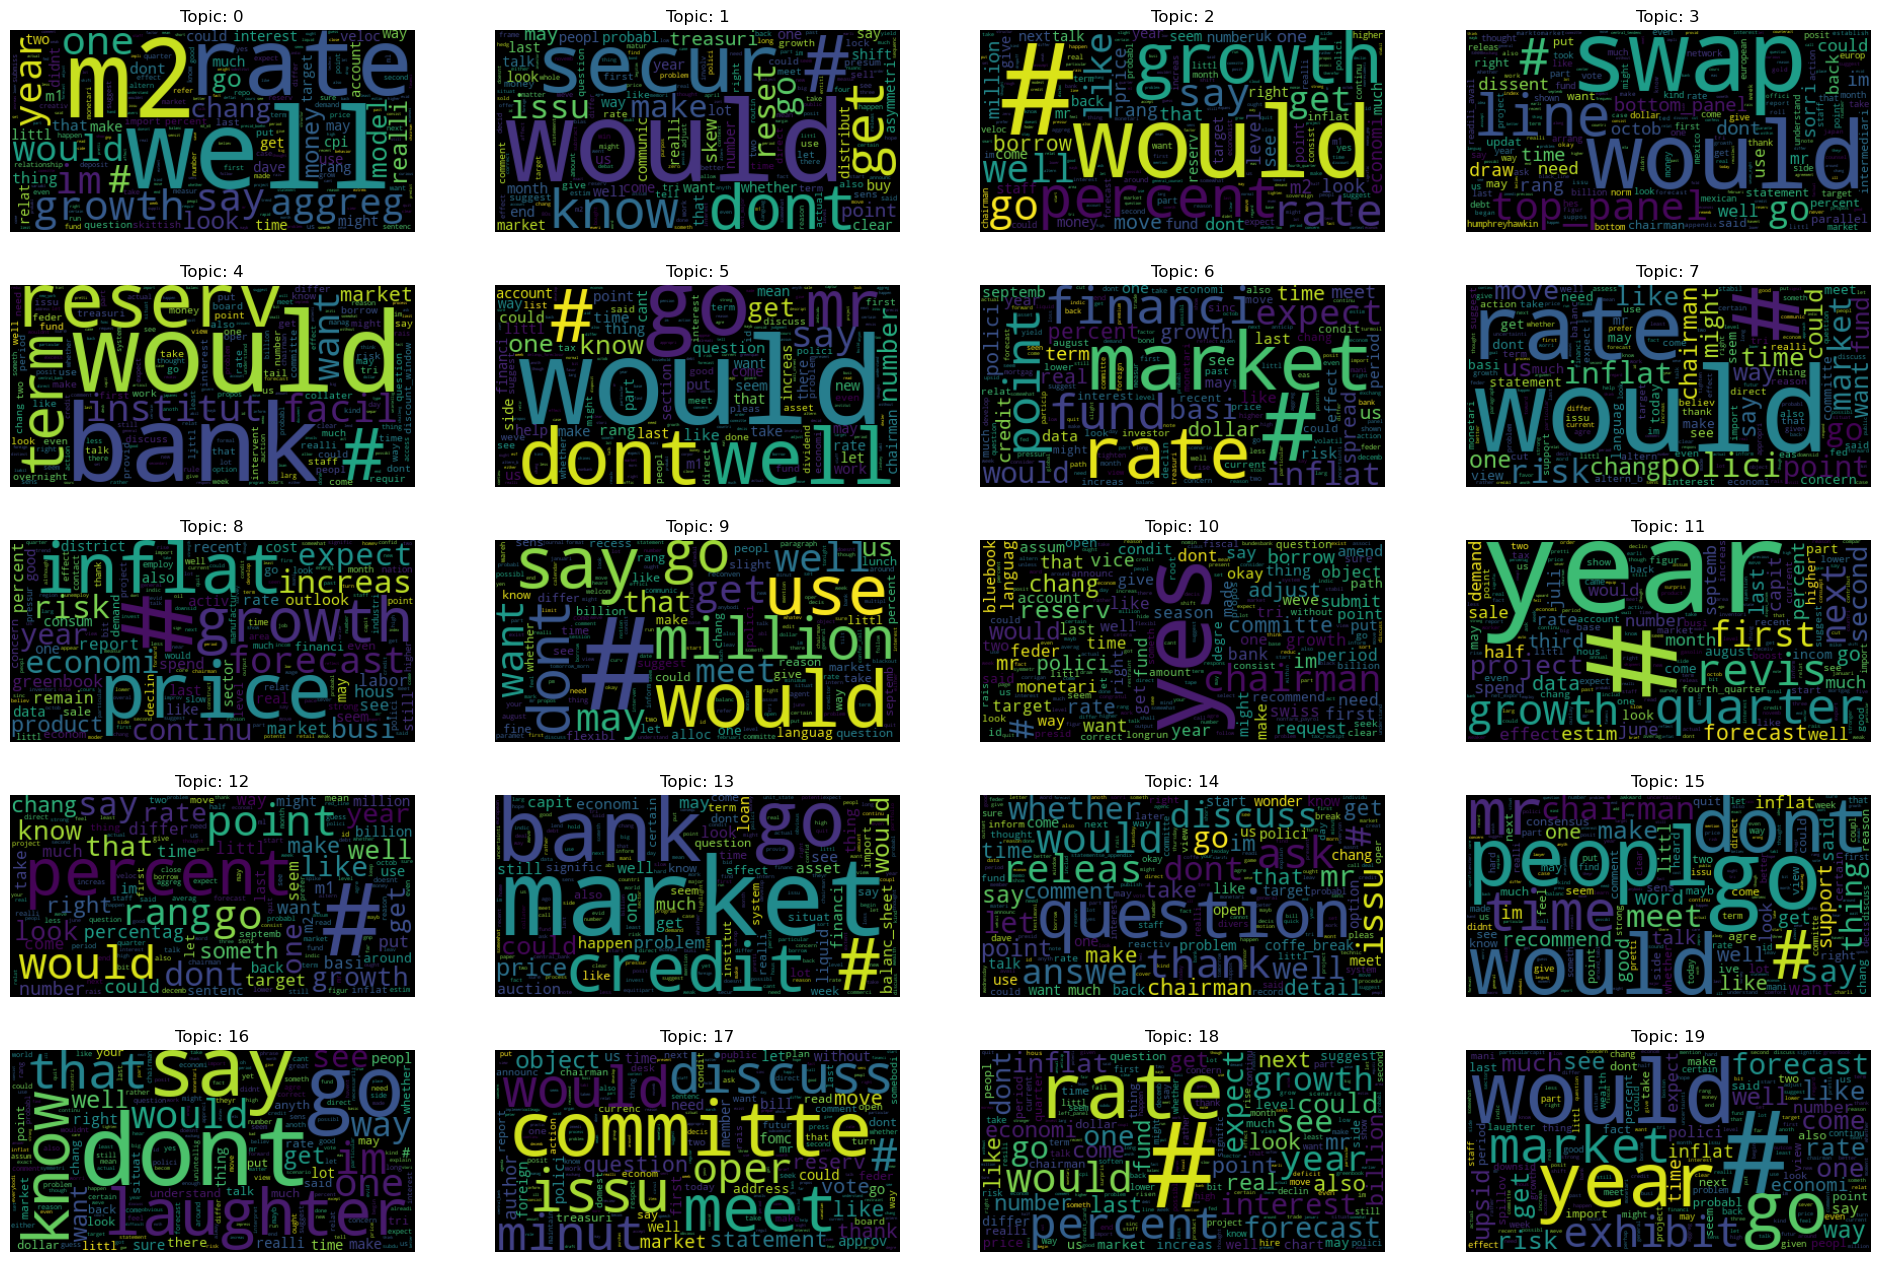

In [133]:
fig, axes = plt.subplots(int(K/4), 4,figsize=(24,int(0.8*K)))

for i, ax in enumerate(axes.flatten()):
    ax.set_title('Topic: ' + str(i))
    wordcloud = WordCloud().generate_from_frequencies(topic_keywords[i])

    # Plot resulting WordCloud
    ax.imshow(wordcloud, interpolation = 'bilinear')
    ax.axis('off')

#### Group rows by meeting

Additional exploratory work can be performed with the data at our disposal. We can for example check the evolution of any one topic in FOMC meetings over time.

In [136]:
appended_data

member  \
0           CHAIRMAN VOLCKER.   
1      VICE CHAIRMAN SOLOMON.   
2                 MR. ZEISEL.   
3           CHAIRMAN VOLCKER.   
4                 MR. ZEISEL.   
...                       ...   
50594            MR. ALVAREZ.   
50595             MS. YELLEN.   
50596            MR. ALVAREZ.   
50597             MS. YELLEN.   
50598             MR. FISHER.   

                                                                                                                                                                                                     statement  \
0                                                                                                   Do we have any comments or questions on how these people see things? I have a question. I understand that    
1       in most or all of these new wage agreements that are coming in at much lower levels, such as the Teamsters and others, there is for the first time a clause indicating that labor can reopen the co...   
2       Yes, it is apparently a fairly common part of a limited number of such agreements so far, and one can understand why. In a sense it's one of the things the union is trading away; that is, the uni...   
3                                                                        You have the line for compensation per hour going down pretty steeply; it's all in the future. What gives you that great confidence?    
4       Well, it's not entirely in the future, but We did have a you're perfectly right that in large degree it is. As I noted in my reduction in compensation over this past year. presentation, I think o...   
...                                                                                                                                                                                                        ...   
50594   I circulated to the general counsels yesterday resolutions that could be presented to the boards of directors that adopt the result of the auction as the recommendation by  December 11, 2007  124...   
50595                                                                                                                                                Do we have those? We have a meeting on Thursday morning.    
50596                                               Yes. The resolutions have all been circulated to all of the general counsels of the Reserve Banks, so they should have them and could be presenting them.    
50597                                                                                                                                        But general counsels normally don’t participate in this process.    
50598   Mr. Chairman, I just want to make sure that I heard you clearly earlier. We have kept this contained, including the swap ranges, which is very impressive. Everybody should pat themselves on the b...   

            date  \
0     1982-02-02   
1     1982-02-02   
2     1982-02-02   
3     1982-02-02   
4     1982-02-02   
...          ...   
50594 2007-12-11   
50595 2007-12-11   
50596 2007-12-11   
50597 2007-12-11   
50598 2007-12-11   

                                                                                                                                                                                                       preproc  \
0                                                                                                                                                         comment question peopl see thing question understand   
1      new wage agreement come much lower level teamster other first time claus indic labor reopen contract know condit improv industri extent like recoveri start bring sharp revers downward trend labor ...   
2      yes appar fair common part limit number agreement far one understand sens one thing union trade away union will accept general reduc fix rate increas wage lean heavili let say cost live adjust wan...   
3                       

In [137]:
mpc_df = appended_data.groupby('date').mean(numeric_only=True).reset_index()
mpc_df.drop(columns='topic', axis=0, inplace=True)

Text(0, 0.5, "Fraction of speaker's time")

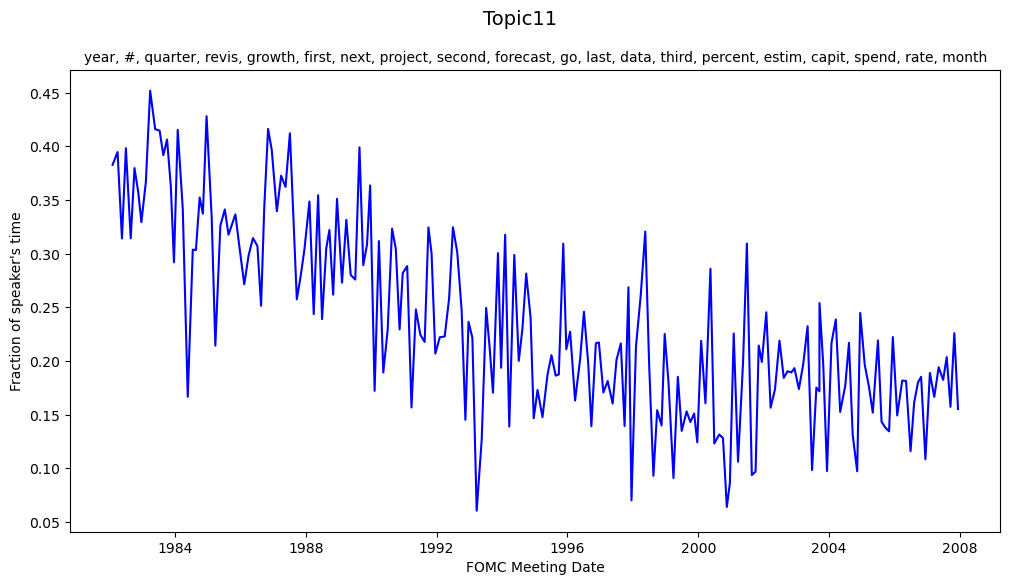

In [138]:
# Define topic to plot
choice_topic = 'Topic11'

# Retreive top words from chosen topic 
numeric = int(re.search('\d+', choice_topic).group(0))
top_words = list(topic_keywords[numeric].keys())[:20]

# Create topic-specific dataframe
plt_df = mpc_df[['date', choice_topic]]

# Plot topic over time
dates = plt_df['date'].to_list()
topic_mean = plt_df[choice_topic].to_list()

# Define figure
fig, ax = plt.subplots(1, 1, figsize=(12,6))
fig.suptitle(choice_topic, fontsize=14)
ax.set_title(', '.join(top_words), fontsize=10)

# plt.style.use('ggplot')
plt.plot(dates, topic_mean, c='blue', label='Mean')
plt.xlabel('FOMC Meeting Date')
plt.ylabel('Fraction of speaker\'s time')

### Member specific topic coverage

We can also look at the coverage of each topic in the Volcker vs. Greenspan eras.

c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\astro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

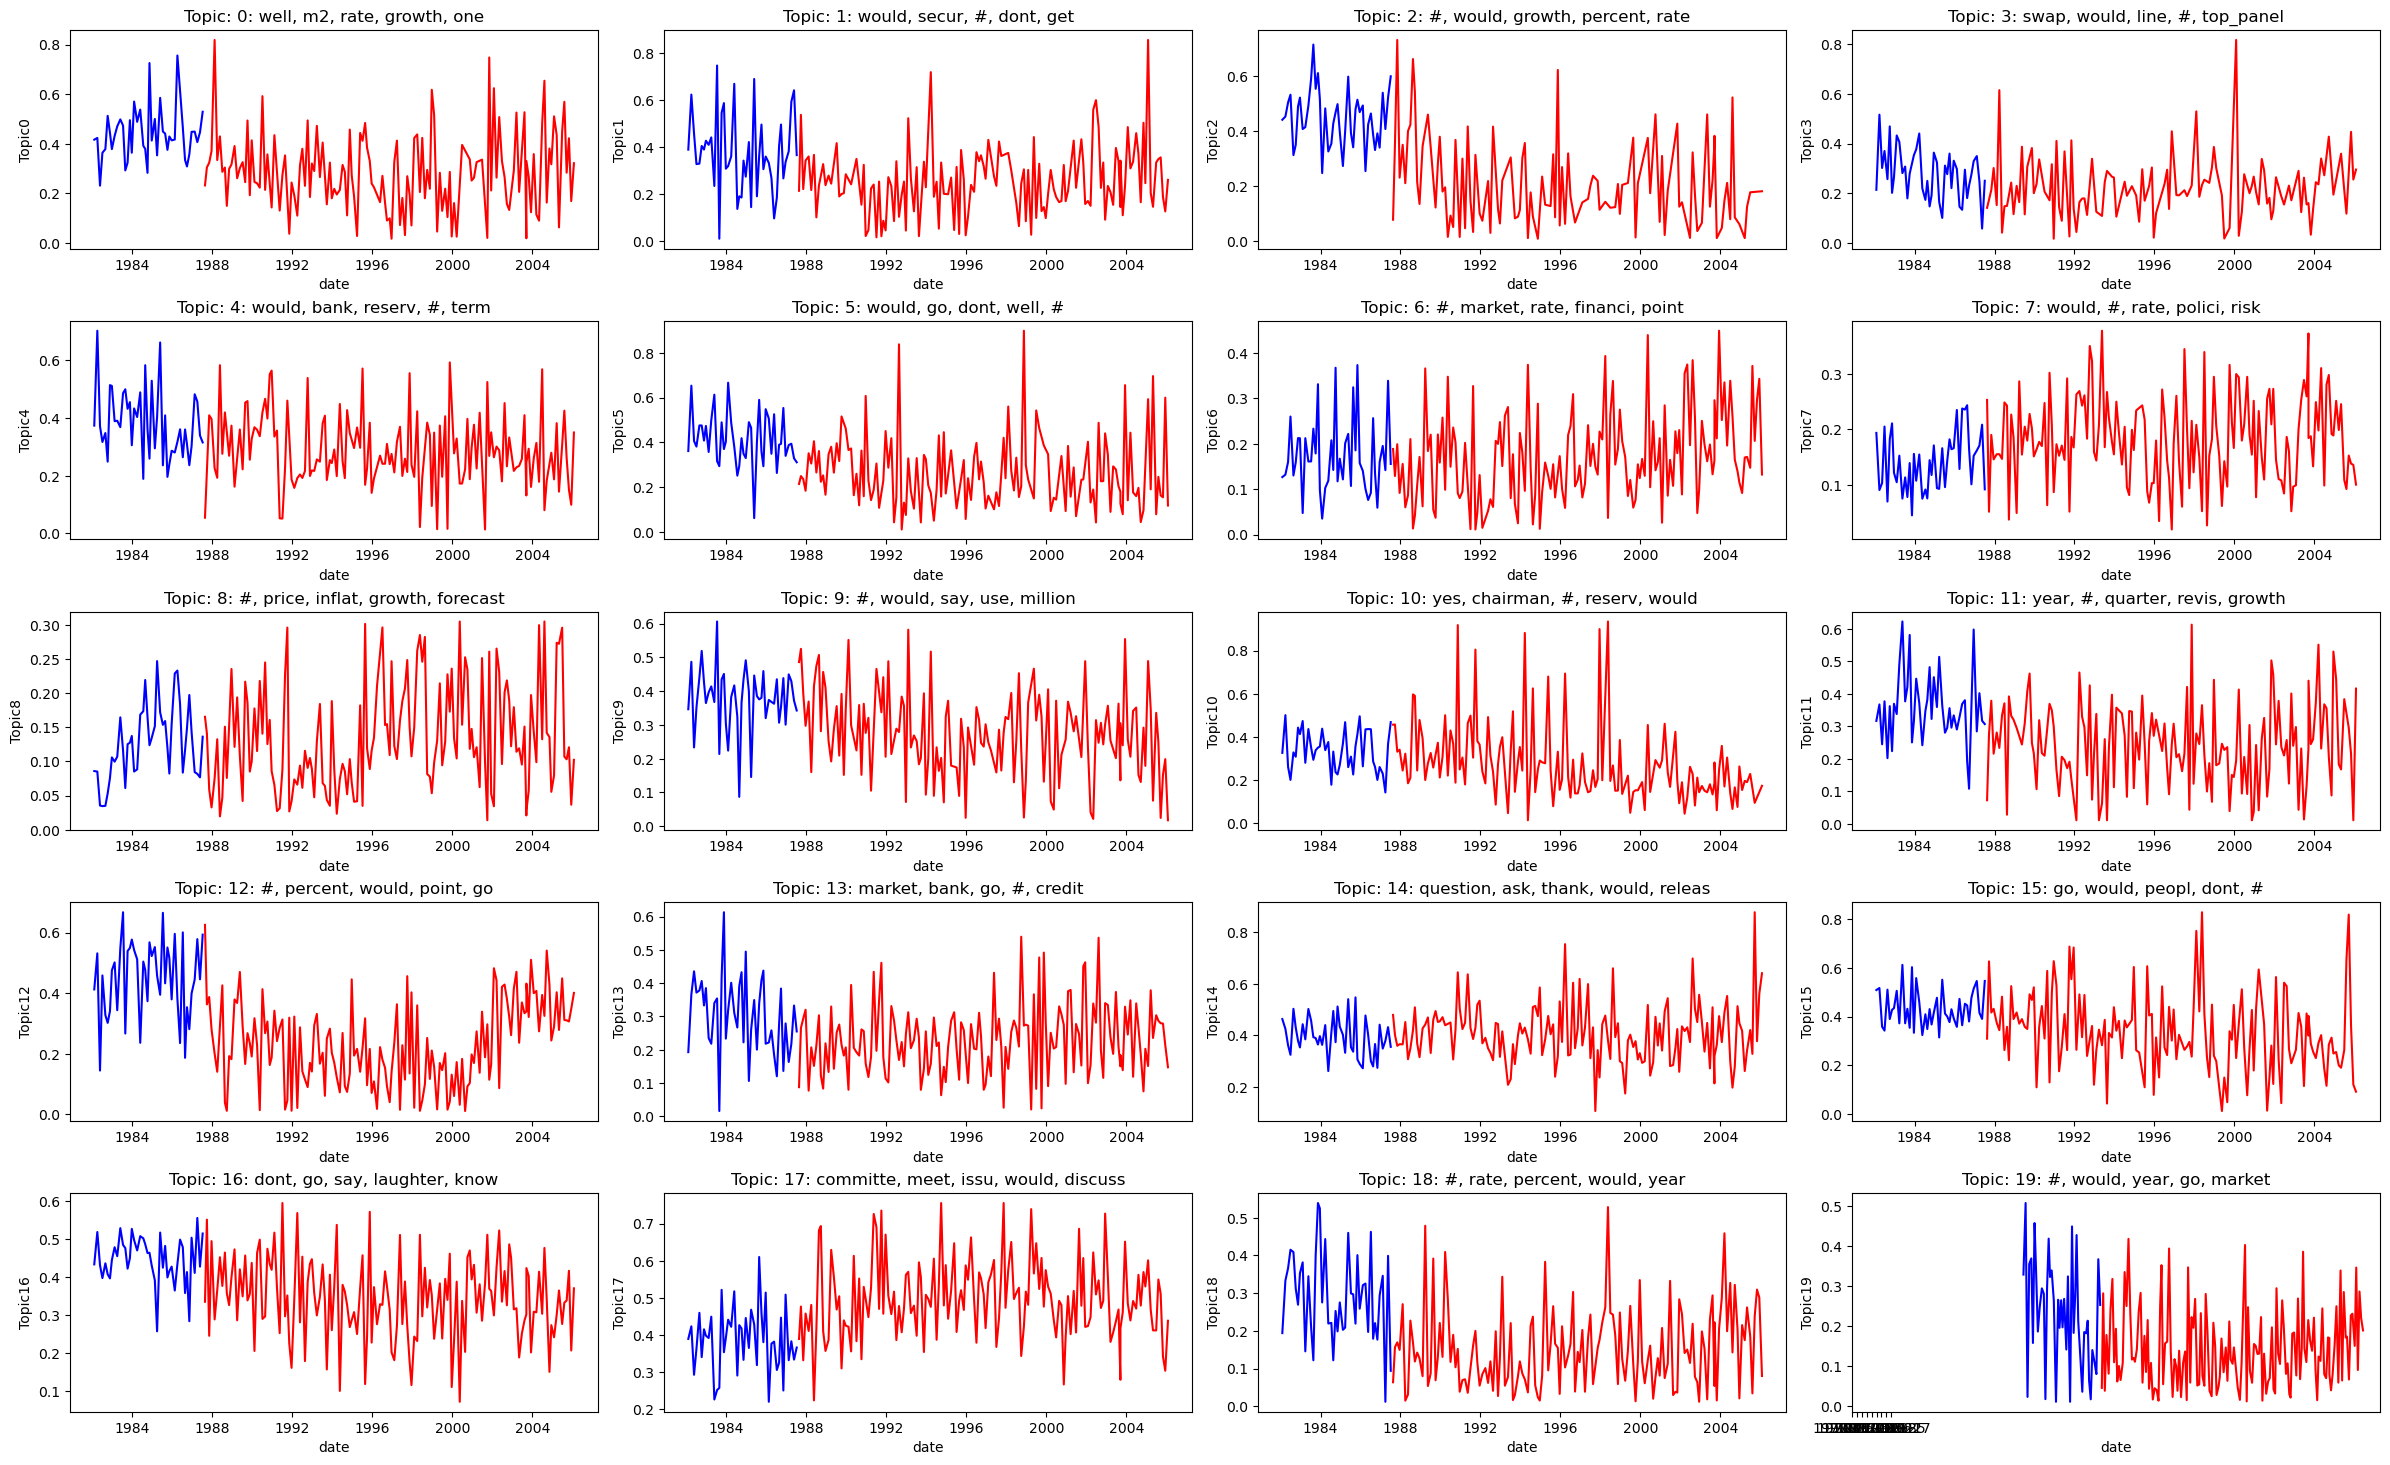

In [139]:
# Member-specific dataframe
plt_df_GS = appended_data.loc[appended_data.member=='CHAIRMAN GREENSPAN.']
plt_df_VK = appended_data.loc[appended_data.member=='CHAIRMAN VOLCKER.']

fig, axes = plt.subplots(int(K/4), 4,figsize=(24,int(0.8*K)))

for i, axs in enumerate(axes.flatten()):
    
    topic_ = 'Topic' + str(i)
    top_words = list(topic_keywords[i].keys())[:5]
    
    subset_GS = plt_df_GS.groupby('date')[topic_].mean().reset_index()
    subset_VK = plt_df_VK.groupby('date')[topic_].mean().reset_index()
    
    sns.lineplot(data=subset_GS, x='date', color='r', y=topic_, ax = axs).set_title('Topic: ' + str(i) + ': ' + ', '.join(top_words))
    sns.lineplot(data=subset_VK, x='date', color='b', y=topic_, ax = axs)
    ax.set(xlabel='FOMC Meeting Date')
    ax.set_ylabel('Fraction on topic')
    

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
plt.show()


# Word2Vec Application


Now we will open a UK tweet data and see whether we can train a model on this corpus and use the resulting model to learn something about the way the different parties see the political leaders.

In [140]:
import pandas as pd
from pathlib import Path
import os
import sys
import csv
import numpy as np

import nltk                                                             # Natural language Toolkit
from nltk.stem import SnowballStemmer                                   # Porter's II Stemmer
from nltk import word_tokenize                                          # Document tokenizer
from nltk.corpus import stopwords 

#for sentiment
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon


from tqdm import tqdm
tqdm.pandas()

#import matplotlib.pyplot as plt

#from sklearn.feature_extraction.text import CountVectorizer


import gensim

# Load the tweet data
file = Path(str(datadir) + '/all_english.csv')
corpus_data =pd.read_csv(file, delimiter=',', encoding='utf-8')

# Filter for tweets from the United Kingdom
corpus_data=corpus_data[corpus_data["group_country"]=="United Kingdom"]
print(corpus_data['party_name'].value_counts())

# Further filter to include only Labour and Conservative parties
corpus_data=corpus_data[(corpus_data['party_name']=="Labour") | (corpus_data['party_name']=="Conservative")]


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\astro\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


party_name
Labour                                40764
Conservative                          32438
Scottish National Party               14673
Liberal Democrat                       1761
Independent                            1306
Plaid Cymru                            1186
Sinn Féin                               796
Social Democratic and Labour Party      401
Green Party                             280
Democratic Unionist Party               186
Alliance Party of Northern Ireland      172
Speaker                                  14
Name: count, dtype: int64


C:\Users\astro\AppData\Local\Temp\ipykernel_5648\3724116489.py:29: DtypeWarning: Columns (13,14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  corpus_data =pd.read_csv(file, delimiter=',', encoding='utf-8')


In [141]:
# Split the data into two groups: Conservative and Labour
conservative_mps=corpus_data[corpus_data['party_name']=="Conservative"].demojized_text
labour_mps=corpus_data[corpus_data['party_name']=="Labour"].demojized_text

In [142]:
# Pre-processing function
import re
stop_words = set(stopwords.words('english')+['-','&amp;','n'])

def tokenize(text):
    tokens = re.split(r'\W+', text)
    stems = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        rem_hyp = re.sub(r"\S*http\S*", '', token)
        rem_ats = re.sub(r'@\S+', '', rem_hyp)
        rem_emo = re.sub(r":.*?:", '', rem_ats)
        rem_hash = re.sub(r"#\S+", '', rem_emo)
        rem_par = re.sub(r'\n', '', rem_hash)
        if re.search('[a-zA-Z]', rem_par):
            if token.lower() not in stop_words: 
                stems.append(token.lower())
    return stems



In [143]:
# Pre-process the Conservative tweets
cons_preproc = (
    conservative_mps
    .astype(str)
    .progress_apply(lambda row: tokenize(row))
)

cons_preproc

  0%|          | 0/32438 [00:00<?, ?it/s]

100%|██████████| 32438/32438 [00:07<00:00, 4065.92it/s]


18360              [going, comment, every, claim, rumour, people, britain, first, bnp, etc, trying, join, conservatives, make, clear, nthe, racist, views, parties, incompatible, values, applications, rejected]
18373                                                                                                                     [always, privilege, attend, state, opening, ukparliament, queensspeech, co, rh9kpqhgkg]
18377                               [hard, time, year, lot, folks, suicide, hotline, samaritans, simple, copy, paste, might, save, someone, life, nwould, twitter, friends, please, copy, text, post, name, pass]
18378              [going, comment, every, claim, rumour, people, britain, first, bnp, etc, trying, join, conservatives, make, clear, nthe, racist, views, parties, incompatible, values, applications, rejected]
18379                                                                                                                                                           

In [144]:
# Pre-process the Labour tweets
labour_preproc = (
    labour_mps
    .astype(str)
    .progress_apply(lambda row: tokenize(row))
)

labour_preproc



100%|██████████| 40764/40764 [00:10<00:00, 3887.81it/s]


18361                          [hard, time, year, lot, folks, nsamaritans, suicide, hotline, na, simple, copy, paste, might, save, someone, life, nwould, twitter, friends, please, copy, text, post, name, pass]
18362                                                                  [hi, lenmccluskey, confirm, much, monthly, subs, going, towards, contributing, towards, humiliating, defeat, thanks, pete, co, spzaladhjf]
18363                                                                                                 [riseofskywalker, first, time, left, star, wars, film, cinema, feeling, disappointed, saw, phantom, menace]
18364                                             [looking, festive, fun, look, pop, along, free, family, craft, session, monday, 21st, december, letsgetcrafty, freefestivefun, lastdaythisyear, co, 0okdgdzhx5]
18367                                                                                                               [webstermark, jreynoldsmp, pretty, newsworth

In [145]:
# Convert pre-processed tweets to list format
labour_texts=labour_preproc.tolist()
cons_texts=cons_preproc.tolist()

In [146]:
len(labour_texts)

40764

In [147]:
# Train Word2Vec models for both parties
labour_model = gensim.models.Word2Vec(labour_texts, min_count=10, vector_size=100, window=10)
cons_model = gensim.models.Word2Vec(cons_texts, min_count=10, vector_size=100, window=10)


In [148]:
#we have embeddings!
print(np.asarray(labour_model.wv.vectors).shape)
print(np.asarray(labour_model.wv.index_to_key).shape)
#what are these dimensions?

(6690, 100)
(6690,)


In [149]:
# Display the first 30 words in the Labour model's vocabulary
for index, word in enumerate(labour_model.wv.index_to_key):
    if index==30:
        break
    print(f"word #{index}/{len(labour_model.wv.index_to_key)} is {word}")

word #0/6690 is co
word #1/6690 is labour
word #2/6690 is amp
word #3/6690 is vote
word #4/6690 is people
word #5/6690 is brexit
word #6/6690 is today
word #7/6690 is government
word #8/6690 is deal
word #9/6690 is thank
word #10/6690 is rose
word #11/6690 is thanks
word #12/6690 is support
word #13/6690 is time
word #14/6690 is us
word #15/6690 is tory
word #16/6690 is get
word #17/6690 is tories
word #18/6690 is great
word #19/6690 is parliament
word #20/6690 is need
word #21/6690 is nhs
word #22/6690 is one
word #23/6690 is uklabour
word #24/6690 is votelabour
word #25/6690 is may
word #26/6690 is election
word #27/6690 is party
word #28/6690 is johnson
word #29/6690 is country


In [150]:
# Find words most similar to 'boris' in both models
labour_model.wv.most_similar(positive=['boris'], topn=30)

[('nboris', 0.9337008595466614),
 ('cummings', 0.8487796783447266),
 ('liar', 0.808478593826294),
 ('mr', 0.7908574938774109),
 ('whenever', 0.7672179341316223),
 ('versus', 0.7497567534446716),
 ('floundering', 0.6967006325721741),
 ('farage', 0.6921828985214233),
 ('teeth', 0.679772138595581),
 ('avoids', 0.6648344993591309),
 ('stunt', 0.6620607972145081),
 ('hypocrisy', 0.6605082154273987),
 ('tells', 0.6514043211936951),
 ('hiding', 0.646858811378479),
 ('sincere', 0.6427209377288818),
 ('trump', 0.6417659521102905),
 ('landslide', 0.6410335302352905),
 ('bottles', 0.6357890367507935),
 ('mentions', 0.6314840912818909),
 ('bounds', 0.6293528079986572),
 ('davis', 0.6268844604492188),
 ('likes', 0.626310408115387),
 ('viewers', 0.6229891777038574),
 ('lies', 0.6202765107154846),
 ('tomorrowspaperstoday', 0.6184089183807373),
 ('answer', 0.6152579188346863),
 ('avoided', 0.6121006608009338),
 ('neil', 0.6091602444648743),
 ('wants', 0.6087154150009155),
 ('anymore', 0.60676681995391

In [151]:
cons_model.wv.most_similar(positive=['boris'], topn=30)

[('johnson', 0.9626192450523376),
 ('theresa', 0.8769642114639282),
 ('may', 0.8679392337799072),
 ('villiers', 0.8309561610221863),
 ('standup4brexit', 0.8302200436592102),
 ('confidence', 0.8289324045181274),
 ('pm', 0.8232927322387695),
 ('backing', 0.8224449157714844),
 ('clear', 0.8207088708877563),
 ('snp', 0.8098893165588379),
 ('indulgent', 0.805398166179657),
 ('motion', 0.8022080659866333),
 ('circumstances', 0.8007476329803467),
 ('lead', 0.7947058081626892),
 ('believes', 0.7933980822563171),
 ('leadership', 0.7881047129631042),
 ('must', 0.7840238809585571),
 ('sturgeon', 0.7808196544647217),
 ('wa', 0.7782076597213745),
 ('nboris', 0.7747160792350769),
 ('actually', 0.7736655473709106),
 ('gets', 0.7722635269165039),
 ('nothing', 0.7711561918258667),
 ('insists', 0.7701737880706787),
 ('option', 0.7700648307800293),
 ('nicola', 0.7683758735656738),
 ('democratic', 0.7675321698188782),
 ('renegotiate', 0.7666664123535156),
 ('ditchthedeal', 0.7663670182228088),
 ('meaningf

In [152]:
print(labour_model.predict_output_word(['johnson'], topn = 50))

[('boris', 1.0), ('nboris', 1.6156569e-12), ('mr', 1.395215e-14), ('oven', 1.630889e-15), ('lying', 1.294843e-15), ('likes', 1.1785498e-15), ('liar', 9.454636e-16), ('nandrew', 4.744492e-16), ('prepared', 3.8703847e-16), ('interview', 2.0855338e-16), ('untrustworthy', 1.4420234e-16), ('hiding', 1.0479135e-16), ('hid', 8.953258e-17), ('dahlxeyn4r', 7.374378e-17), ('hides', 3.4110794e-17), ('khv48viixk', 2.9159483e-17), ('neil', 2.6606789e-17), ('fridge', 2.4365333e-17), ('trusted', 2.4364569e-17), ('provenliar', 2.1872e-17), ('oq21uddtje', 1.4882462e-17), ('deemed', 9.738909e-18), ('afneil', 8.7217965e-18), ('truth', 8.085483e-18), ('farage', 6.3451995e-18), ('cummings', 6.178013e-18), ('nasty', 4.2053275e-18), ('commit', 2.5380048e-18), ('trump', 2.33114e-18), ('bbcleadersdebate', 2.212732e-18), ('late', 2.0058685e-18), ('scrutiny', 1.900066e-18), ('mentions', 1.8375418e-18), ('ready', 1.8371663e-18), ('cs81f4zy09', 1.7511012e-18), ('caught', 1.5166071e-18), ('answer', 1.3932627e-18), 

In [153]:
print(cons_model.predict_output_word(['boris'], topn = 50))

[('johnson', 0.43609023), ('theresa', 0.043904405), ('boris', 0.039291862), ('may', 0.016195185), ('confidence', 0.014902377), ('pm', 0.011123933), ('no10', 0.009944122), ('prime', 0.009903266), ('4ryuh19c75', 0.00806041), ('jeremy', 0.007772521), ('backing', 0.007444473), ('deal', 0.006251398), ('unfit', 0.005633674), ('sturgeon', 0.005396107), ('standup4brexit', 0.005283109), ('theresa_may', 0.004115443), ('motion', 0.003975206), ('says', 0.0036138361), ('risks', 0.003490931), ('wins', 0.0032905284), ('yougov', 0.002698024), ('actually', 0.0026733412), ('withdrawal', 0.0026367847), ('nicola', 0.0025530597), ('downing', 0.0023644387), ('agreement', 0.0022674093), ('urge', 0.0021260018), ('defeat', 0.0020075664), ('believes', 0.0019913272), ('leadership', 0.0019147731), ('stepped', 0.0018639541), ('risk', 0.0018481808), ('brexit', 0.0018312427), ('watch', 0.001821789), ('meps', 0.0017672782), ('wake', 0.0017411904), ('chaos', 0.0016959796), ('coalition', 0.001478665), ('snp', 0.0014432

In [154]:
print(cons_model.predict_output_word(['jeremy'], topn = 50))

[('corbyn', 0.6676468), ('jeremy', 0.20533426), ('stupid', 0.04558984), ('downing', 0.011118932), ('sturgeon', 0.0060616713), ('shadow', 0.0032570232), ('woman', 0.0028070547), ('ashworth', 0.0027082132), ('dem', 0.0023069754), ('antisemitism', 0.0017551312), ('anti', 0.0017153764), ('unfit', 0.0016409147), ('semitism', 0.0015579936), ('no10', 0.0014885851), ('clearly', 0.0014560614), ('motion', 0.0013224689), ('nicola', 0.0012116164), ('jon', 0.001144848), ('mcdonnell', 0.0010371335), ('lib', 0.0007752197), ('saying', 0.0007644576), ('pmqs', 0.0007615524), ('johnson', 0.0006731207), ('ncon', 0.00066852116), ('dems', 0.00064925465), ('warning', 0.00063377677), ('theresa', 0.0006259976), ('jeremycorbyn', 0.000556786), ('watch', 0.00045861385), ('former', 0.00045677362), ('yougov', 0.00045581267), ('lip', 0.00045118324), ('fifteen', 0.00043881798), ('says', 0.00042518813), ('confidence', 0.0004159683), ('propped', 0.00039432783), ('thinks', 0.00038189156), ('calling', 0.0003787101), ('mr

In [155]:
print(labour_model.predict_output_word(['jeremy'], topn = 50))

[('corbyn', 0.86351615), ('jeremy', 0.11526733), ('confidence', 0.00035457086), ('jeremycorbyn', 0.00034835408), ('interview', 0.00028072417), ('conservative', 0.00026359427), ('bbc', 0.00025637294), ('fridge', 0.00024547376), ('leader', 0.00021002234), ('andrew', 0.00020754835), ('prepared', 0.00019942748), ('scared', 0.00018858578), ('scrutiny', 0.00017340771), ('statement', 0.00016468532), ('debate', 0.00016419943), ('oven', 0.00015869831), ('hides', 0.0001553477), ('neil', 0.00015368473), ('njeremy', 0.0001523644), ('breaking', 0.00015220407), ('misleading', 0.00014786664), ('nandrew', 0.0001305742), ('untrustworthy', 0.00012552635), ('6rmy6nzncw', 0.00012471288), ('oh', 0.00011854039), ('agreement', 0.00011318471), ('says', 0.000105958825), ('afneil', 0.00010089683), ('party', 9.536826e-05), ('prime', 9.4838935e-05), ('bbcdebate', 9.423211e-05), ('pmqs', 9.323483e-05), ('withdrawal', 9.214162e-05), ('former', 8.766524e-05), ('motion', 8.292586e-05), ('wins', 7.9175516e-05), ('eyes

In [156]:
# Get top 100 context words for 'boris' and 'jeremy' in Conservative model
rows=cons_model.predict_output_word(['boris'], topn = 100)
cons_boris_words = [x[0] for x in rows]

rows=cons_model.predict_output_word(['jeremy'], topn = 100)
cons_jeremy_words = [x[0] for x in rows]


In [157]:
# Get top 100 context words for 'boris' and 'jeremy' in Labour model
rows=labour_model.predict_output_word(['boris'], topn = 100)
labour_boris_words = [x[0] for x in rows]

rows=labour_model.predict_output_word(['jeremy'], topn = 100)
labour_jeremy_words = [x[0] for x in rows]

In [158]:
# Function to compute sentiment score based on positive and negative word lists
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

def sentiment(tweet):
    senti=0
    try:
        words = [word for word in tweet]
        for word in words:
            if word in pos_list:
              senti += 1
            elif word in neg_list:
              senti -= 1
    except:
        pass
    return senti

In [159]:
# Compute and print sentiment scores for context words of 'boris' and 'jeremy' in both models
print("context words of conservative and Boris have sentiment score:",  sentiment(cons_boris_words))
print("context words of labour and Boris have sentiment score:", sentiment(labour_boris_words))

print("context words of conservative and Jeremy have sentiment score:",sentiment(cons_jeremy_words))
print("context words of labour and Jeremy have sentiment score:",sentiment(labour_jeremy_words))

context words of conservative and Boris have sentiment score: -3
context words of labour and Boris have sentiment score: -10
context words of conservative and Jeremy have sentiment score: -13
context words of labour and Jeremy have sentiment score: -4


In [160]:
# Compute sentiment scores for various terms in both models
rows=cons_model.predict_output_word(['uk'], topn = 100)
print(sentiment([x[0] for x in rows]))
rows=labour_model.predict_output_word(['uk'], topn = 100)
print(sentiment([x[0] for x in rows]))

4
-4


In [161]:
rows=cons_model.predict_output_word(['workers'], topn = 100)
print(sentiment([x[0] for x in rows]))
rows=labour_model.predict_output_word(['workers'], topn = 100)
print(sentiment([x[0] for x in rows]))

3
-1


In [162]:
rows=cons_model.predict_output_word(['social'], topn = 100)
print(sentiment([x[0] for x in rows]))
rows=labour_model.predict_output_word(['social'], topn = 100)
print(sentiment([x[0] for x in rows]))

0
-3


In [163]:
rows=cons_model.predict_output_word(['parliament'], topn = 100)
print(sentiment([x[0] for x in rows]))
rows=labour_model.predict_output_word(['parliament'], topn = 100)
print(sentiment([x[0] for x in rows]))

-3
2


In [164]:
rows=cons_model.predict_output_word(['eu'], topn = 100)
print(sentiment([x[0] for x in rows]))
rows=labour_model.predict_output_word(['eu'], topn = 100)
print(sentiment([x[0] for x in rows]))

-3
-9


In [165]:
# condensed version of the processor - pre-processes and then makes Word2Vec model

def process_and_word2vec(text):
    preproc = (
        text
        .astype(str)
        .progress_apply(lambda row: tokenize(row))
    )

    texts=preproc.tolist()
    print("Making Word2Vec")
    return gensim.models.Word2Vec(texts, min_count=10, vector_size=100)

In [166]:
# Load and process additional datasets, then train Word2Vec models
my_file = Path(str(datadir) + "/uk1_hannes.csv")
corpus_data =pd.read_csv(my_file, delimiter=',', encoding='utf-8')

election_text=corpus_data[corpus_data["lang"]=="en"].text

print("processing election text")
election_model=process_and_word2vec(election_text)

my_file = Path(str(datadir) + "/uk2_hannes.csv")
corpus_data =pd.read_csv(my_file, delimiter=',', encoding='utf-8')

early_text=corpus_data[corpus_data["lang"]=="en"].text

print("processing early text")
early_model=process_and_word2vec(early_text)





C:\Users\astro\AppData\Local\Temp\ipykernel_5648\487865394.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  corpus_data =pd.read_csv(my_file, delimiter=',', encoding='utf-8')


processing election text


100%|██████████| 196183/196183 [01:29<00:00, 2183.19it/s]


Making Word2Vec


C:\Users\astro\AppData\Local\Temp\ipykernel_5648\487865394.py:10: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  corpus_data =pd.read_csv(my_file, delimiter=',', encoding='utf-8')


processing early text


100%|██████████| 174319/174319 [01:25<00:00, 2035.32it/s]


Making Word2Vec


In [167]:
# Compute sentiment scores for context words of 'europe', 'jeremy', and 'boris' in both models
rows=election_model.predict_output_word(['europe'], topn = 100)
print(sentiment([x[0] for x in rows]))
rows=early_model.predict_output_word(['europe'], topn = 100)
print(sentiment([x[0] for x in rows]))

5
9


In [168]:
rows=election_model.predict_output_word(['jeremy'], topn = 100)
print(sentiment([x[0] for x in rows]))
rows=early_model.predict_output_word(['jeremy'], topn = 100)
print(sentiment([x[0] for x in rows]))

-20
-9


In [169]:
rows=election_model.predict_output_word(['boris'], topn = 100)
print(sentiment([x[0] for x in rows]))
rows=early_model.predict_output_word(['boris'], topn = 100)
print(sentiment([x[0] for x in rows]))

-6
-10


## Exercise

1) Check how robust these findings are to modification in the pre-processing and word2vec hyperparameters.

2) Can you find a term that polarized the sentiments of party communication on twitter particularly? 

3) Can you find a particularly telling change in sentiment over time regarding a term?